# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [35]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

In [36]:
# null values in each column
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [37]:
df.duplicated().sum()

0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

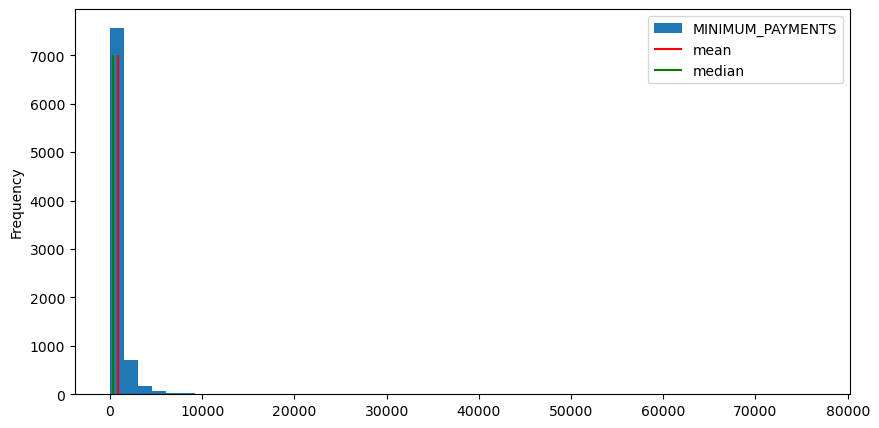

In [39]:
df['MINIMUM_PAYMENTS'].plot(kind='hist', bins=50, figsize=(10, 5))
plt.vlines(df['MINIMUM_PAYMENTS'].mean(), 0, 7000, color='r', label='mean')
plt.vlines(df['MINIMUM_PAYMENTS'].median(), 0, 7000, color='g', label='median')
plt.legend()

In [40]:
df.drop('CUST_ID', axis=1, inplace=True)

#### let see what columns that have outlier    

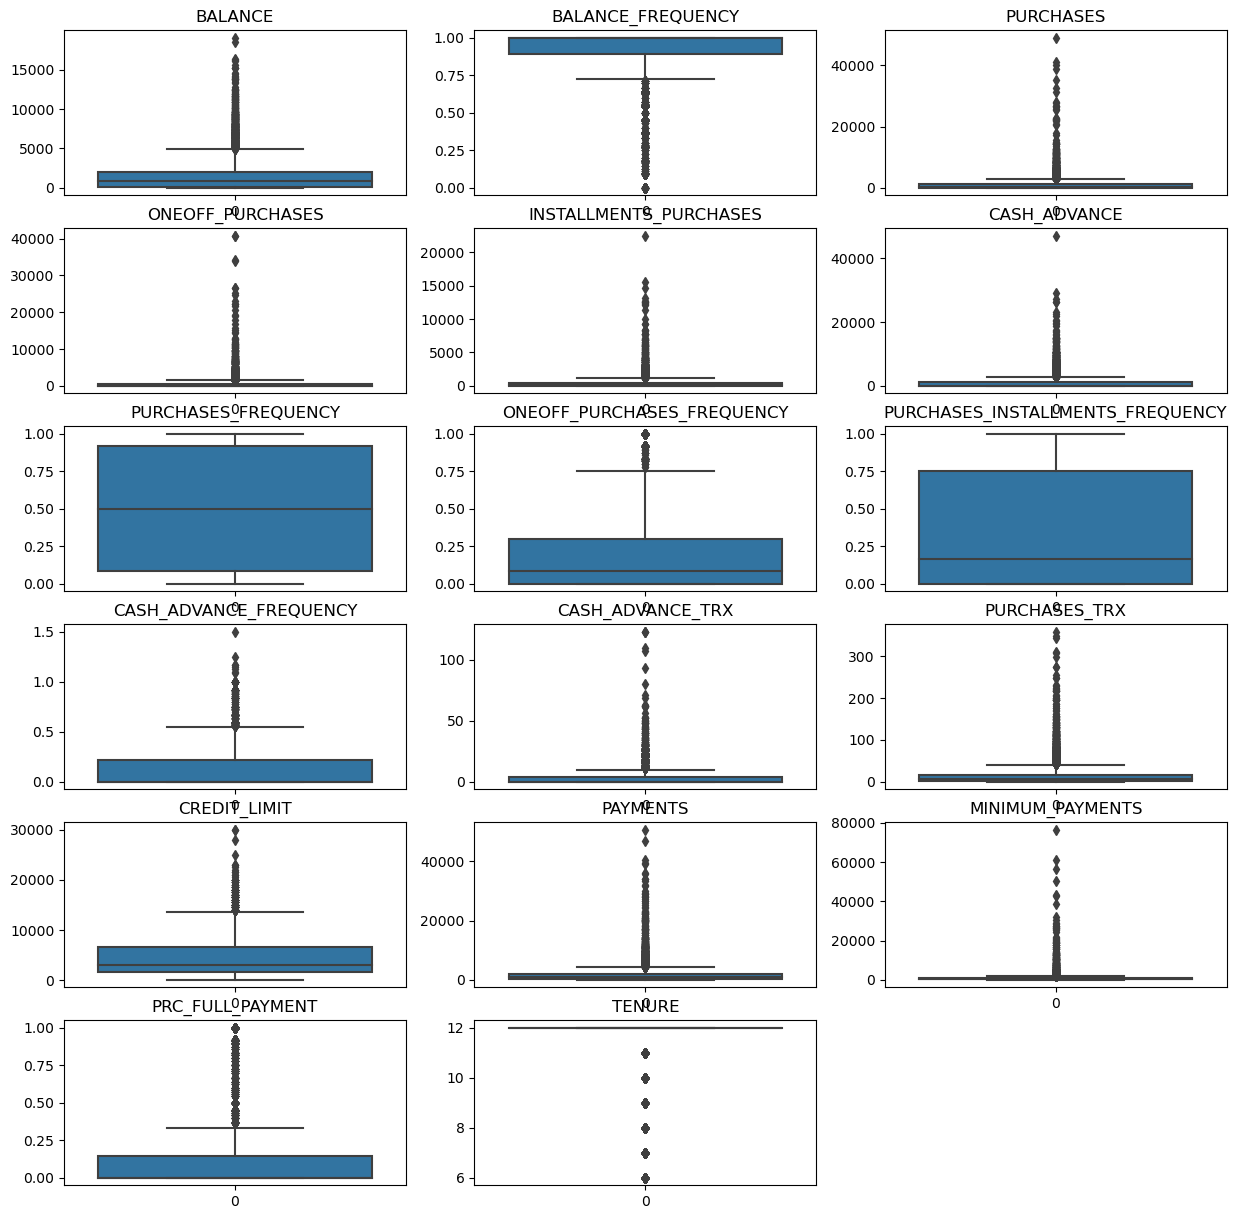

In [41]:

plt.figure(figsize=(15, 15))
for i, col in enumerate(df.columns):
    plt.subplot(6, 3, i+1)
    sns.boxplot(df[col])
    plt.title(col)

<h3>it is clear that we have a lot of ouliers in all columns of
so i will apply log transformation in non frequency table because they have a limited values min 0 max 1

In [42]:
outliers = ['BALANCE','PURCHASES','CASH_ADVANCE','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_TRX','CASH_ADVANCE_TRX']

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- we have 313 misssing value MINIMUM_PAYMENTS  <br>
2- we almost have outliers in all columns          <br>
3-  as expected there is skewness in distributions of columns because of outliers         <br>

In [43]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue** <br>
    we have missing values in MINIMUM_PAYMENTS columns
    and as we see the distribution of MINIMUM_PAYMENTS is skewd to left so we have 3 options
    <ul>
        <li>Drop the missing values</li>
        <li>Fill data with mean or median but in our case due to skenewss we will use mean</li>
        <li>Use imputer like Knn</li>
    </ul>
    so i choosed to drop the missing values as they are represent tiny porton of the dataset

In [44]:
#solution 
# i will drop them
df_copy.dropna(inplace=True)

In [45]:
#test 
df_copy.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Second issue** 
<br>
    we almostly have outliers in all columns
    <ul>
        <li>so we can drop outliers data but we must see the porpotion of it because we can drop a lot of data and it seams in data we have here that we have ouliers in all columns which will represent a huge amount of data of we droped it</li>
        <li>we can use log transformation</li>
        <li>we can leave it as it is</li>
    </ul>
    Questions here how i evaluate which one is right and this is unsupervised problem ?

and how to deal with outliers

In [46]:
df_copy.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

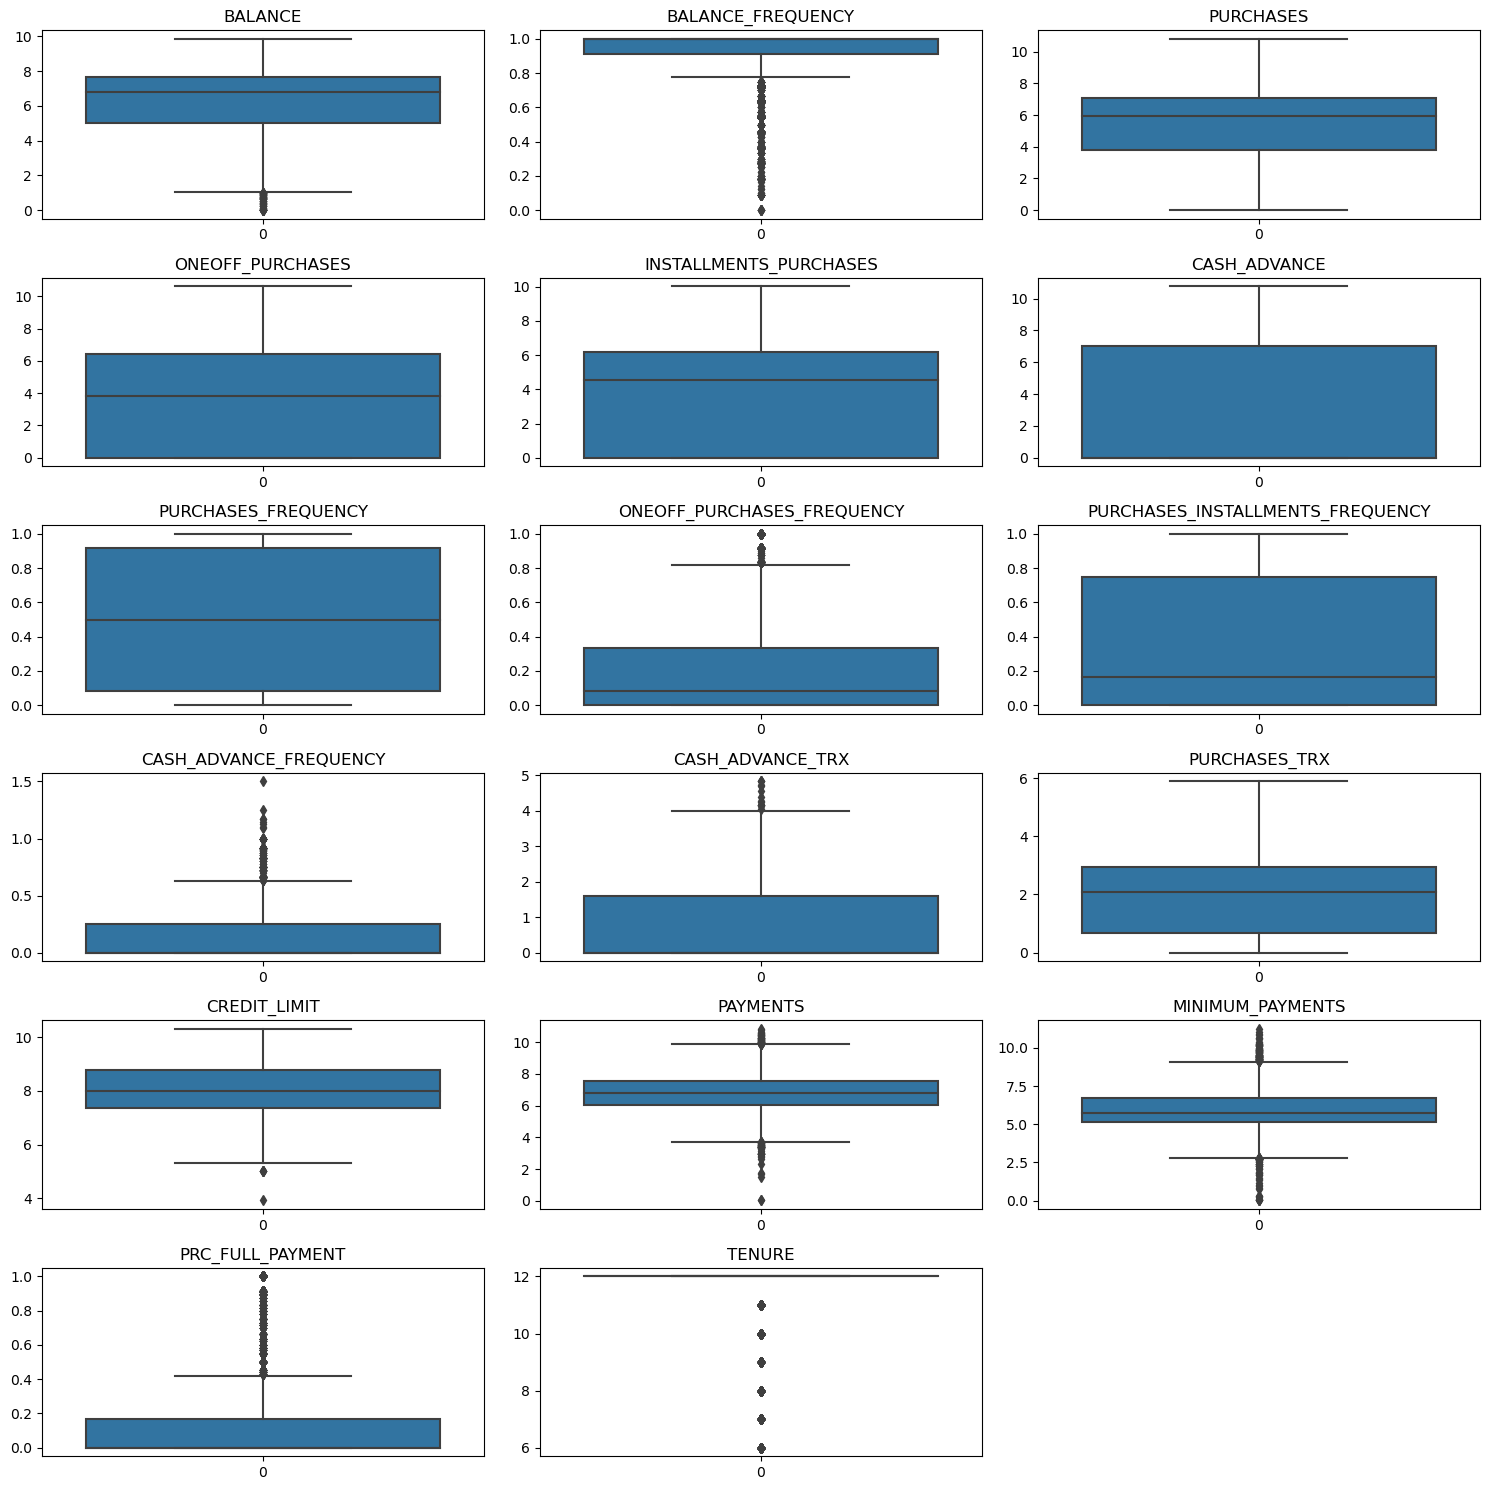

In [47]:
#solution 
# i will use log transformation to solve the problem of outliers
# we can use log transformation to remove the skewness in the data
# i have inf values while using log1p

df_copy[outliers] = np.log(df_copy[outliers]+1) 
transformed_data= df_copy

plt.figure(figsize=(15, 15))
for i, col in enumerate(transformed_data.columns):
    plt.subplot(6, 3, i+1)
    sns.boxplot(transformed_data[col])
    plt.tight_layout()
    plt.title(col)

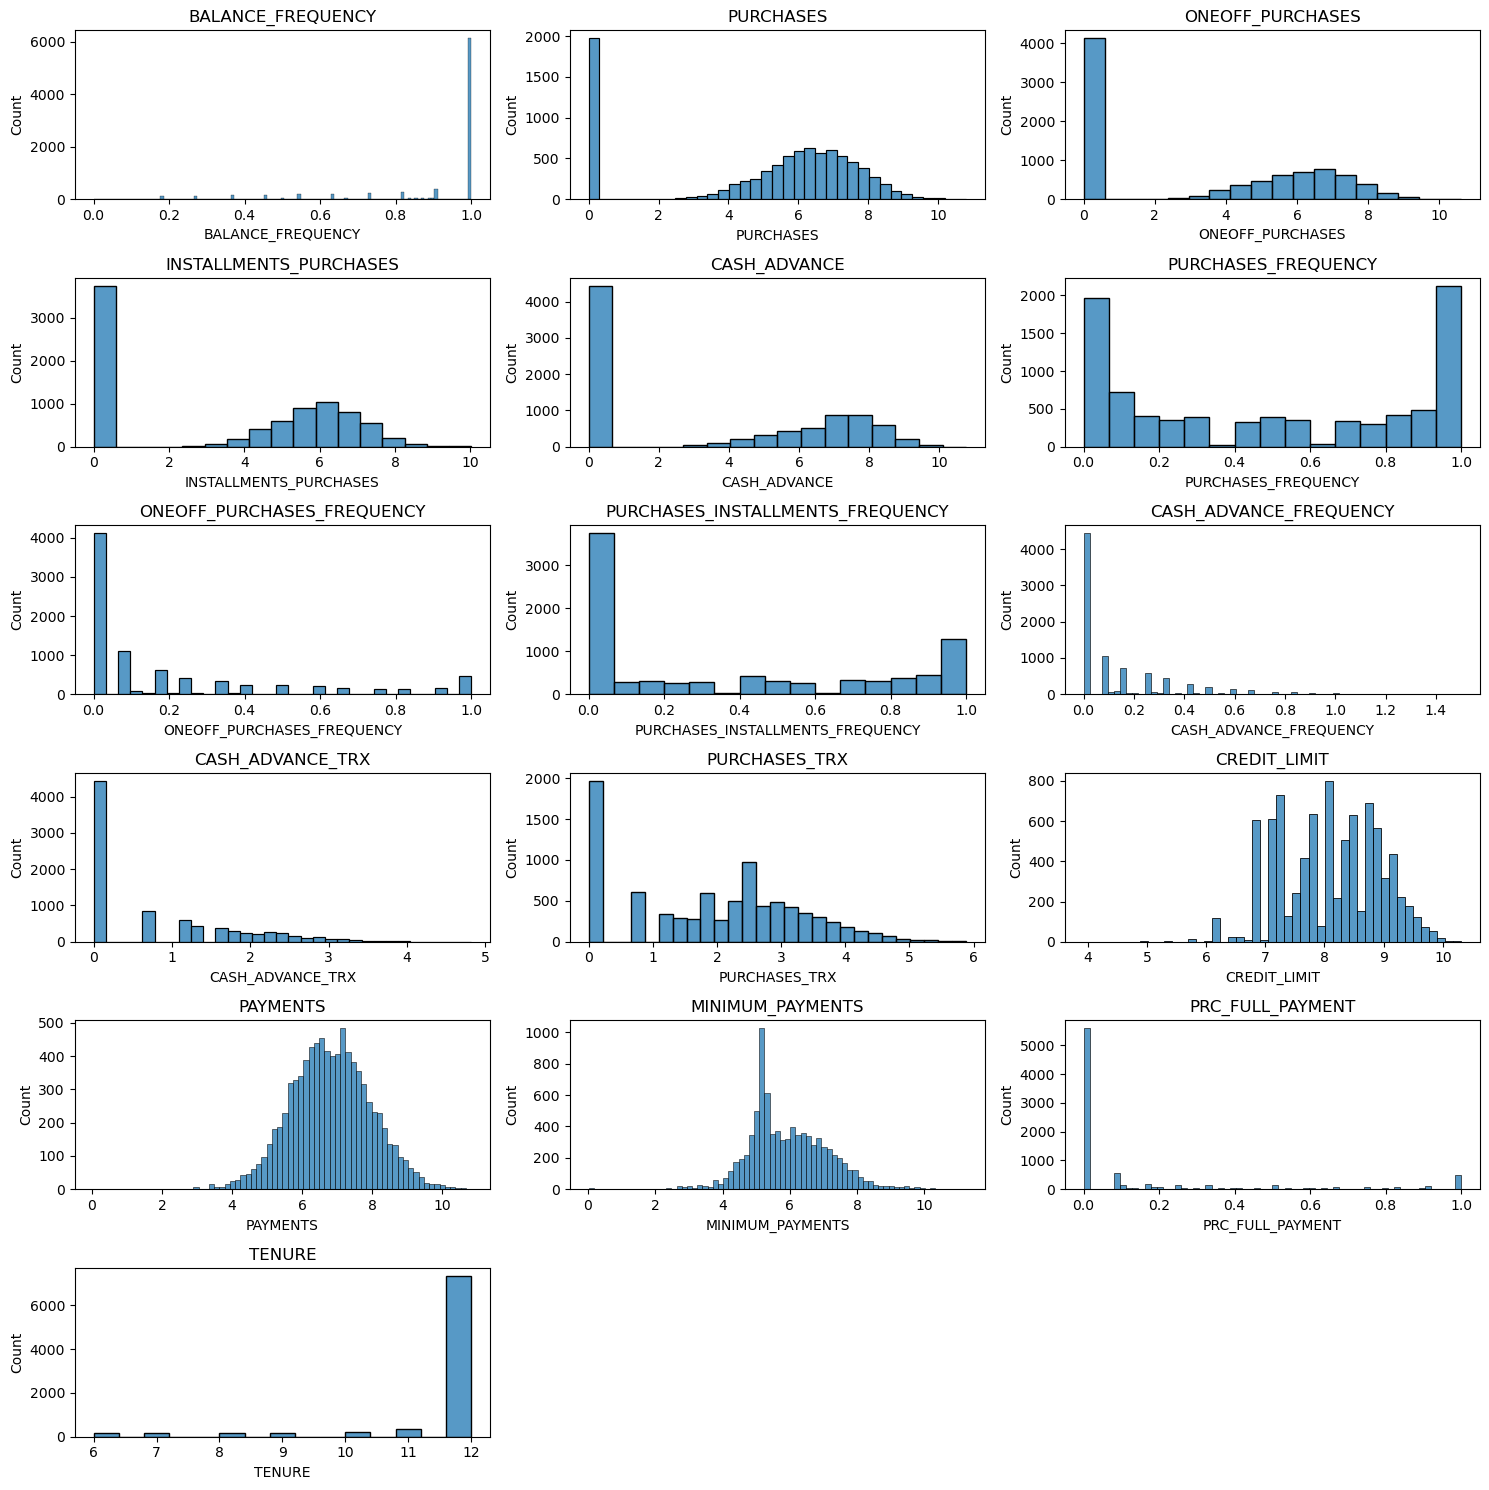

In [48]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(transformed_data.columns[1:]):
    plt.subplot(6, 3, i+1)
    sns.histplot(transformed_data[col])
    plt.tight_layout()
    plt.title(col)

Answer here:

In [49]:
transformed_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [50]:
transformed_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  3.735304           0.818182   4.568506          0.000000   
1  8.071989           0.909091   0.000000          0.000000   
2  7.822504           1.000000   6.651791          6.651791   
4  6.707735           1.000000   2.833213          2.833213   
5  7.501540           1.000000   7.196147          0.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.568506      0.000000             0.166667   
1                0.000000      8.770896             0.000000   
2                0.000000      0.000000             1.000000   
4                0.000000      0.000000             0.083333   
5                7.196147      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00          0.000000       1.098612      6.908755   
1                    0.25          1.609438       0.000000      8.853808   
2                    0.00          0.000000       2.564949      8.922792   
4                    0.00          0.000000       0.693147      7.090910   
5                    0.00          0.000000       2.197225      7.496097   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  5.312231          4.945277          0.000000      12  
1  8.319725          6.978531          0.222222      12  
2  6.434654          6.442994          0.000000      12  
4  6.521114          5.504483          0.000000      12  
5  7.244983          7.786654          0.000000      12

how to choose tsne hyberparameters ?


In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=50,early_exaggeration=5,init='pca')
tsne_empeddings = tsne.fit_transform(transformed_data)

<Axes: >

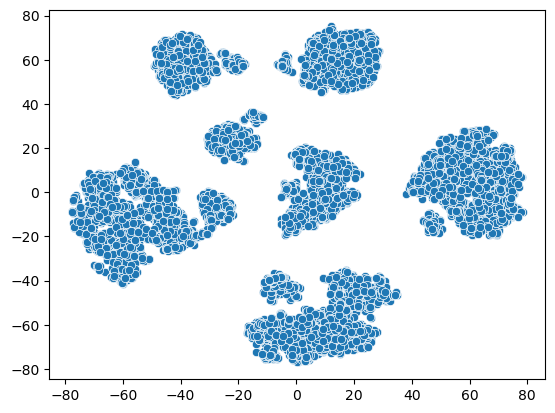

In [52]:
sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1))

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

<h3> I will Try Kmans with normal data</h3>

In [53]:
from sklearn.cluster import KMeans

<h4> Let's Do Some Hyperparameter Tuining on N of Clusters

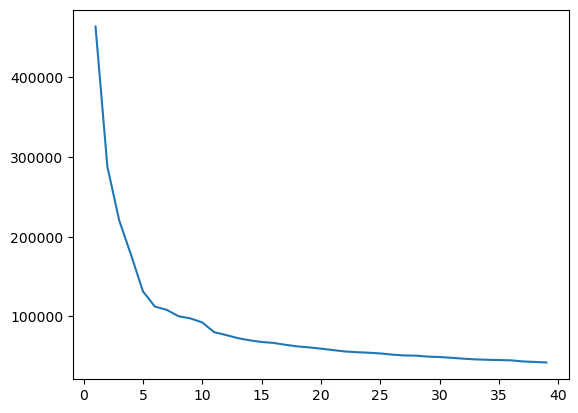

In [54]:
n_clusters = np.arange(1,40)
inertia = []
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(transformed_data)
    inertia.append(kmeans.inertia_)

plt.plot(n_clusters,inertia)
    

<Axes: >

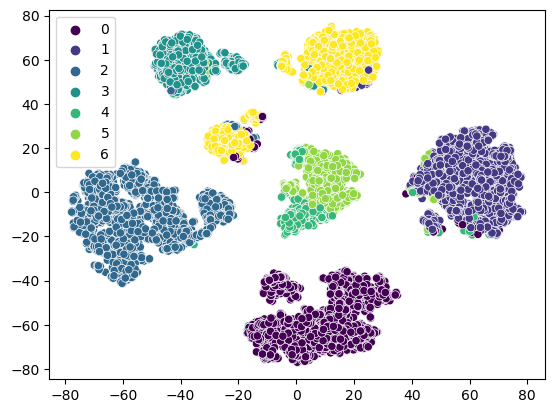

In [55]:
kmeans = KMeans(n_clusters=7, n_init="auto").fit(transformed_data)
sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=kmeans.labels_,palette='viridis')

In [56]:
from sklearn.metrics import silhouette_score
silhouette_score(transformed_data, kmeans.labels_)

0.39859496947087364

<h3>Let's add pca</h3>

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.97)
pca_transformed_data = pca.fit_transform(transformed_data)

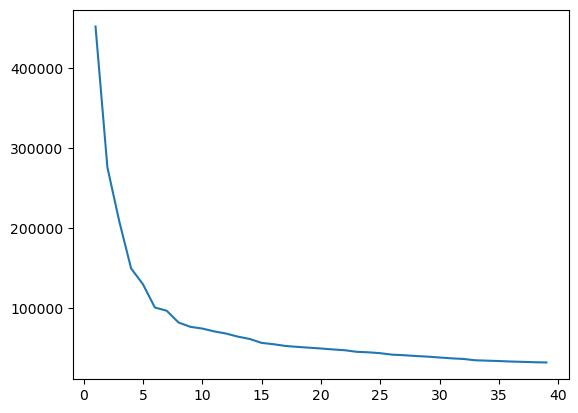

In [58]:
n_clusters = np.arange(1,40)
inertia = []
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(pca_transformed_data)
    inertia.append(kmeans.inertia_)

plt.plot(n_clusters,inertia)

<Axes: >

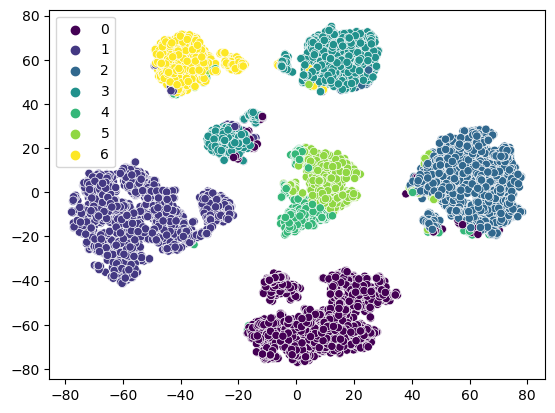

In [59]:
kmeans = KMeans(n_clusters=7, n_init="auto").fit(pca_transformed_data)
sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=kmeans.labels_,palette='viridis')

In [60]:
silhouette_score(pca_transformed_data, kmeans.labels_)

0.42687233887558174

<h3>let's try hiraricha clustring </h3>

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

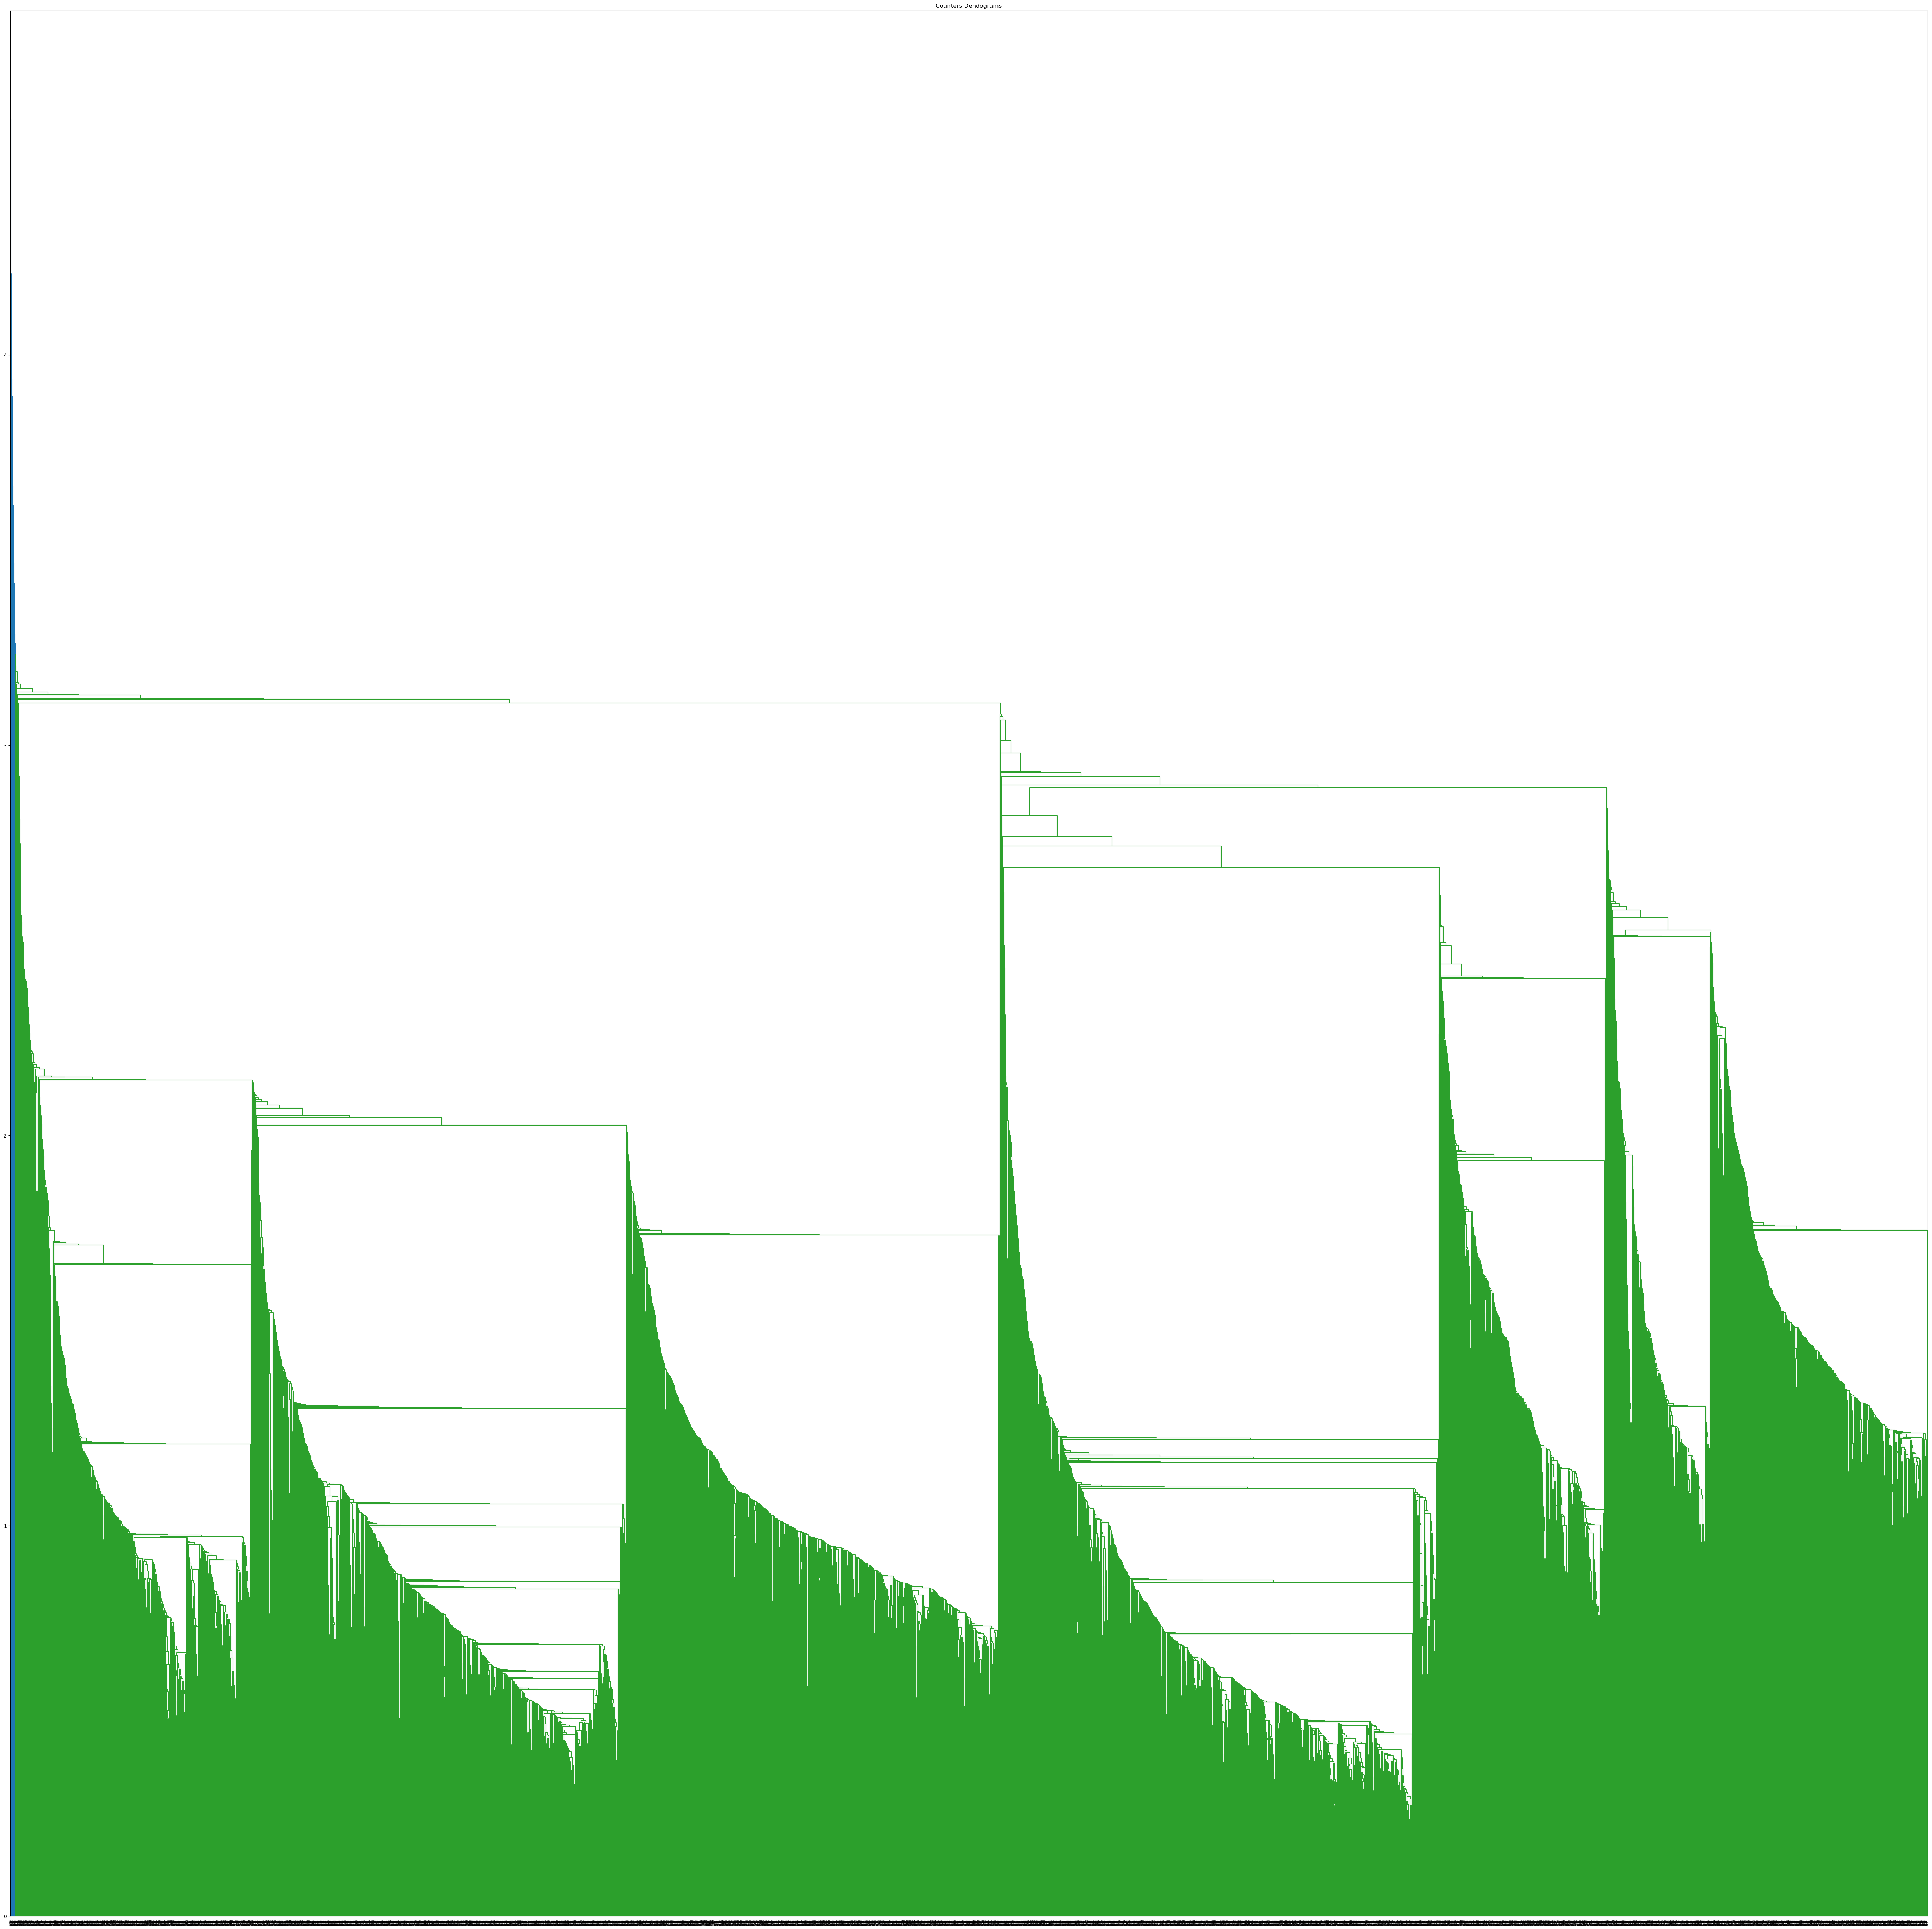

In [61]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(70, 70))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=transformed_data , method='single',metric='euclidean'))

seliouette score for linkage = complete and distance = euclidean and n_clusters = 5 is 0.19187749243850818


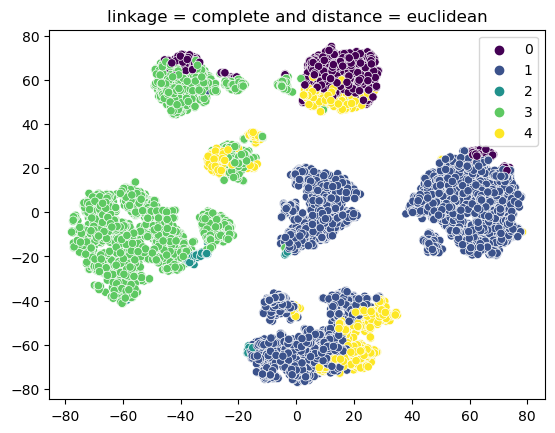

seliouette score for linkage = complete and distance = euclidean and n_clusters = 6 is 0.13897785959094222


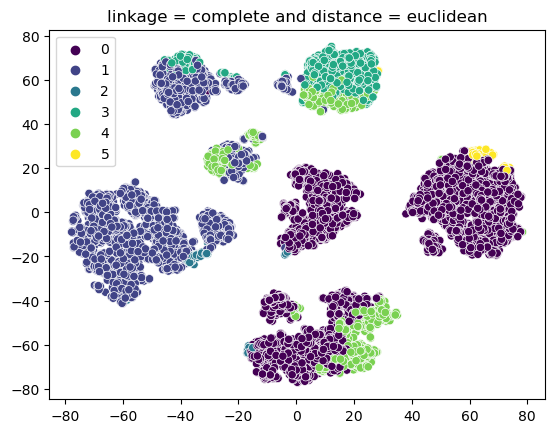

seliouette score for linkage = complete and distance = manhattan and n_clusters = 5 is 0.201049716237247


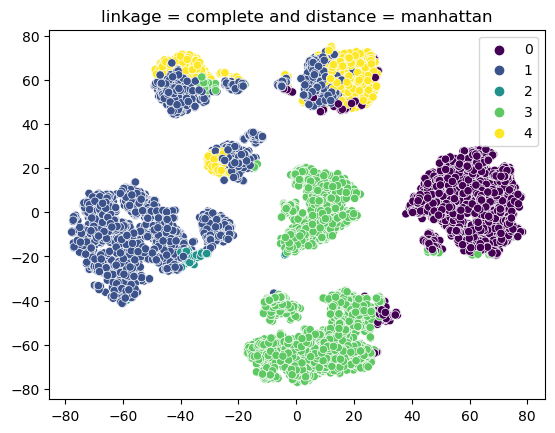

seliouette score for linkage = complete and distance = manhattan and n_clusters = 6 is 0.16765664135122255


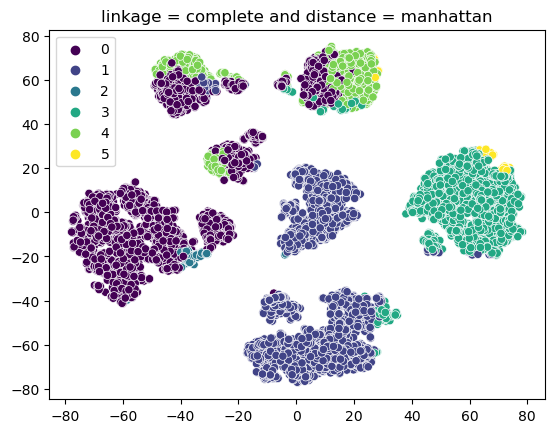

seliouette score for linkage = complete and distance = cosine and n_clusters = 5 is 0.29048349607221646


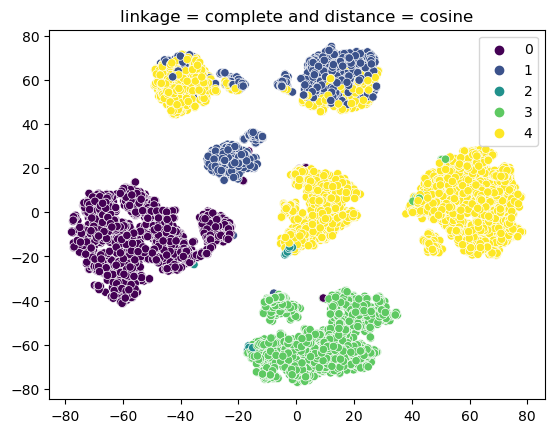

seliouette score for linkage = complete and distance = cosine and n_clusters = 6 is 0.18149351962499835


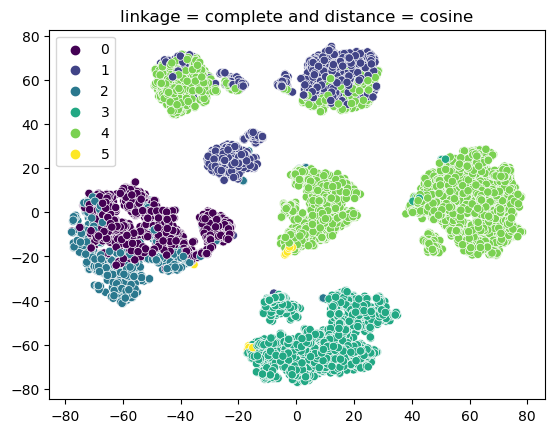

seliouette score for linkage = average and distance = euclidean and n_clusters = 5 is 0.3320078942060062


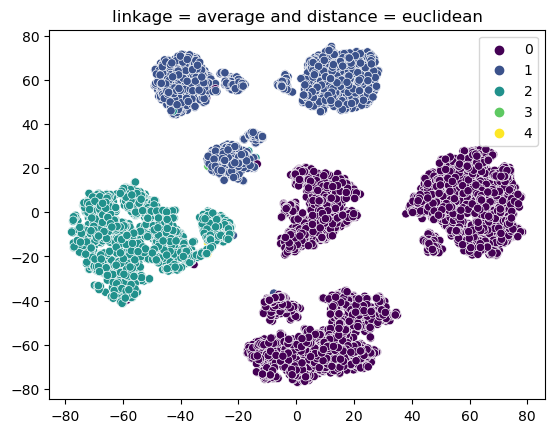

seliouette score for linkage = average and distance = euclidean and n_clusters = 6 is 0.35420080045701174


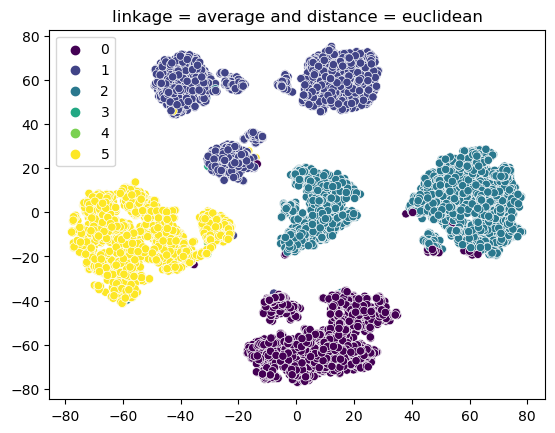

seliouette score for linkage = average and distance = manhattan and n_clusters = 5 is 0.1895000893889557


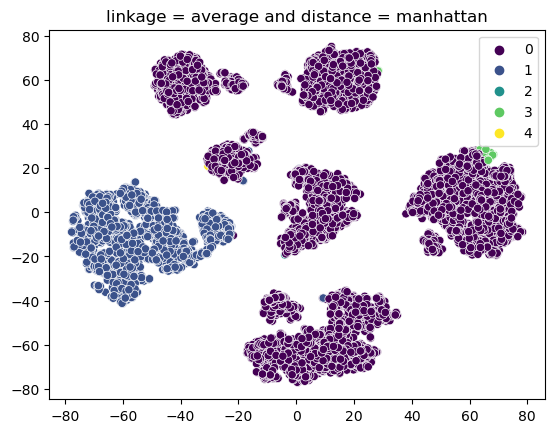

seliouette score for linkage = average and distance = manhattan and n_clusters = 6 is 0.27877241809437814


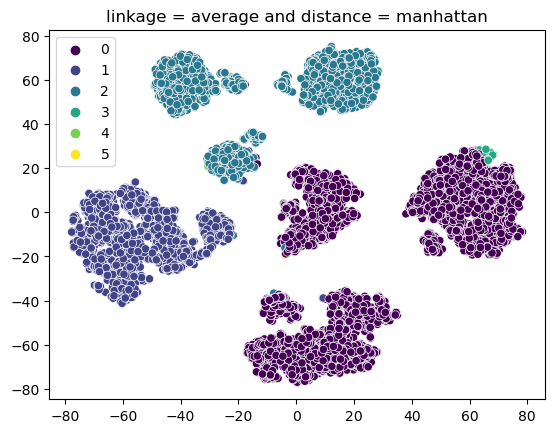

seliouette score for linkage = average and distance = cosine and n_clusters = 5 is 0.23242419527720828


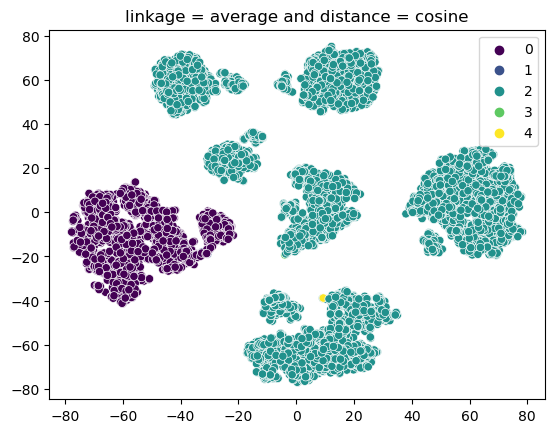

seliouette score for linkage = average and distance = cosine and n_clusters = 6 is 0.2096392443289663


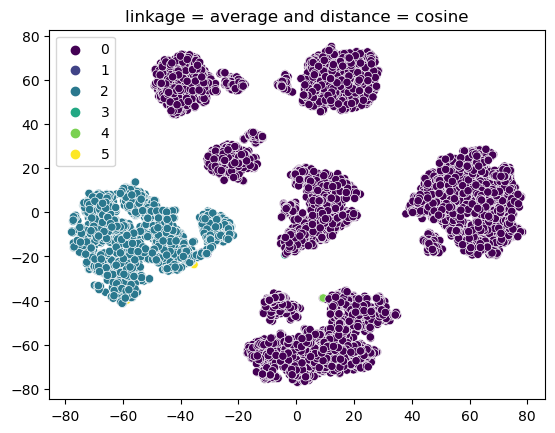

seliouette score for linkage = single and distance = euclidean and n_clusters = 5 is -0.006064688111368042


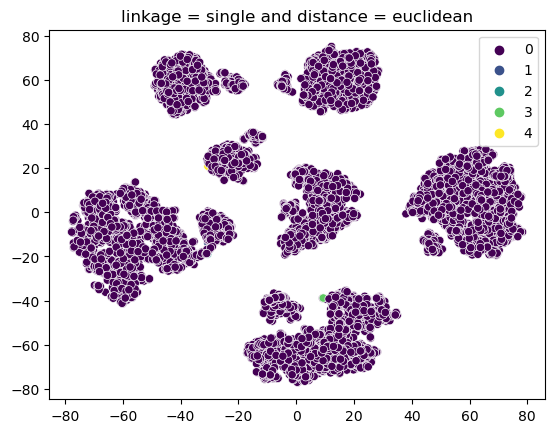

seliouette score for linkage = single and distance = euclidean and n_clusters = 6 is -0.08252972724715338


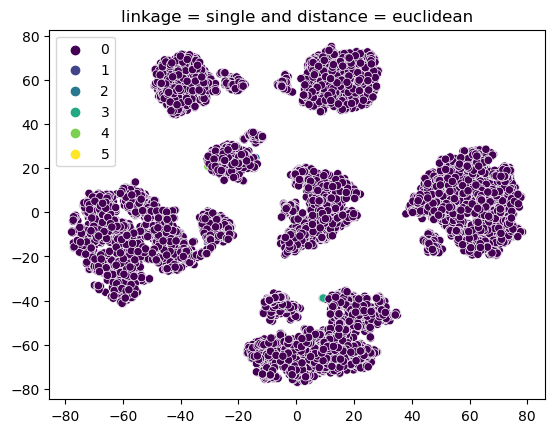

seliouette score for linkage = single and distance = manhattan and n_clusters = 5 is -0.15061315069494707


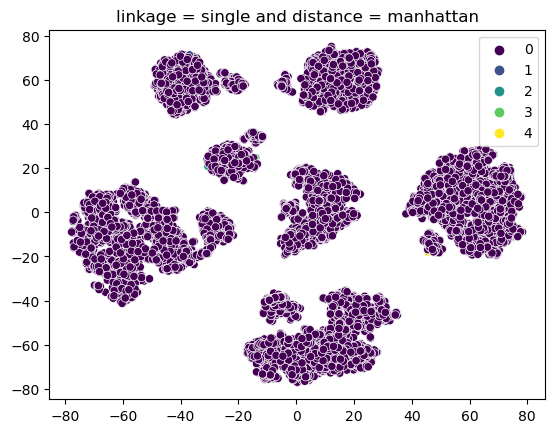

seliouette score for linkage = single and distance = manhattan and n_clusters = 6 is -0.1715449566496157


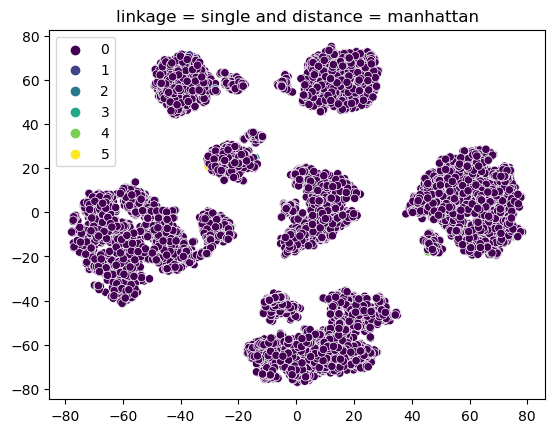

seliouette score for linkage = single and distance = cosine and n_clusters = 5 is 0.04036575373730931


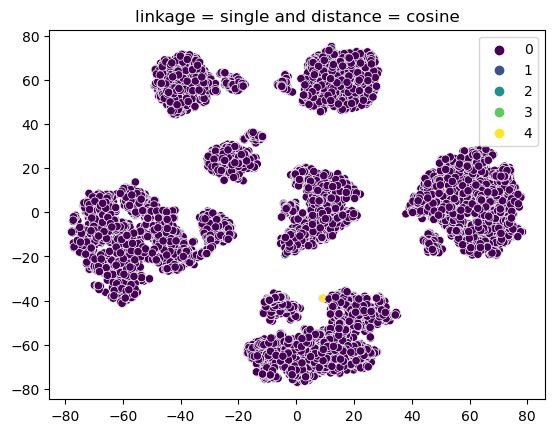

seliouette score for linkage = single and distance = cosine and n_clusters = 6 is -0.0551575824201247


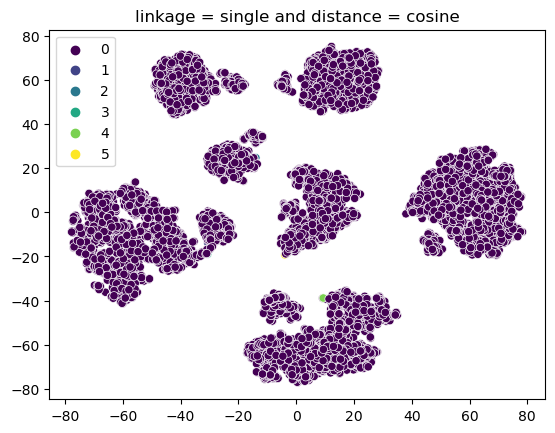

In [62]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = np.arange(5,7)
linkage = ['complete', 'average', 'single']
distance = ['euclidean','manhattan', 'cosine']
inertia = []
for l in linkage:
    for d in distance:
        for i in n_clusters:
            agg = AgglomerativeClustering(n_clusters=i, linkage=l, affinity=d).fit(transformed_data)
            print("seliouette score for linkage = {} and distance = {} and n_clusters = {} is {}".format(l, d, i, silhouette_score(transformed_data, agg.labels_)))
            sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=agg.labels_,palette='viridis')
            plt.title('linkage = {} and distance = {}'.format(l, d))
            silhouette_score(transformed_data, agg.fit_predict(transformed_data))
            plt.show()

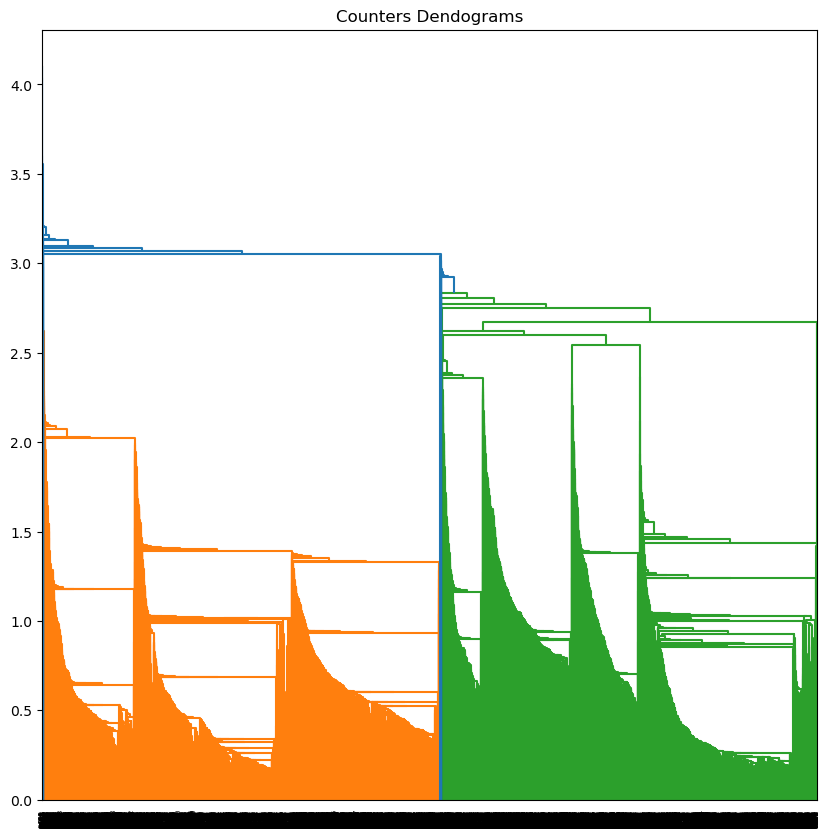

In [63]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=pca_transformed_data , method='single',metric='euclidean')) #fill y with your dataframe

Using PCA

Shilouette score:  0.2789799354962903


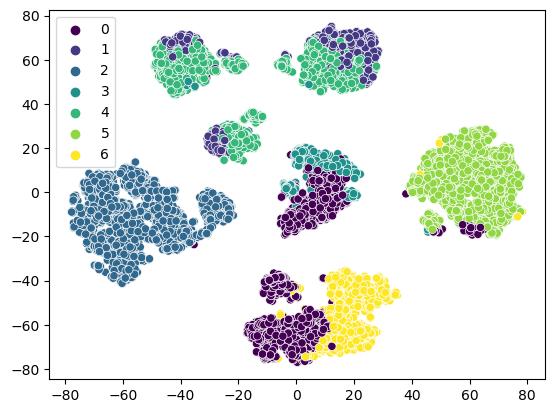

In [64]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = np.arange(2,7)
# linkage = ['ward', 'complete', 'average', 'single']
# for l in linkage:
#         for i in n_clusters:
#             agg = AgglomerativeClustering(n_clusters=i, linkage=l).fit(pca_transformed_data)
#             print("Shilouette score: ",silhouette_score(pca_transformed_data, agg.labels_))
#             sns.scatterplot(x=pca_transformed_data[:,:1].reshape(-1),y = pca_transformed_data[:,1:].reshape(-1),hue=agg.labels_,palette='viridis')
#             plt.title('linkage = {} and distance = {}'.format(l, i))
#             plt.show()
agg = AgglomerativeClustering(n_clusters=7, linkage='complete').fit(pca_transformed_data)
print("Shilouette score: ",silhouette_score(pca_transformed_data, agg.labels_))
sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=agg.labels_,palette='viridis')
plt.show()


Shilouette score:  0.403876785415589


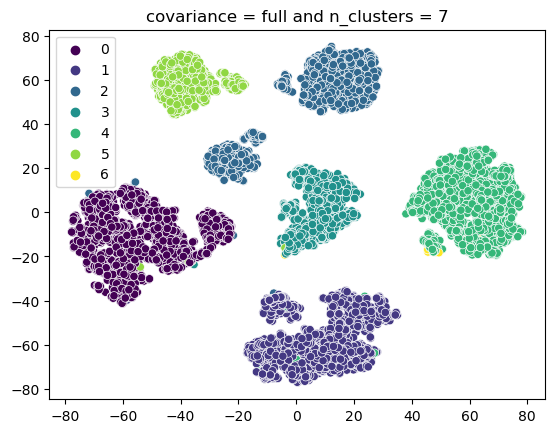

Shilouette score:  0.3963876482951562


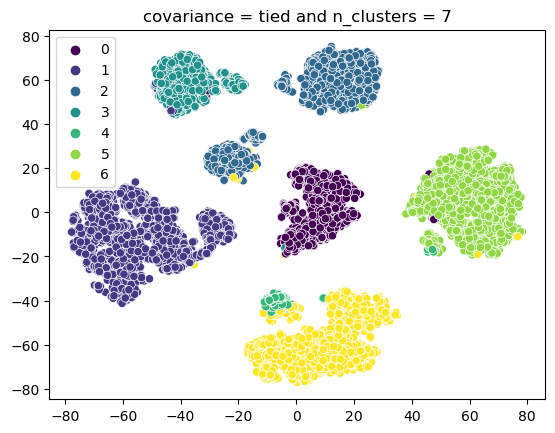

Shilouette score:  0.4349878726202013


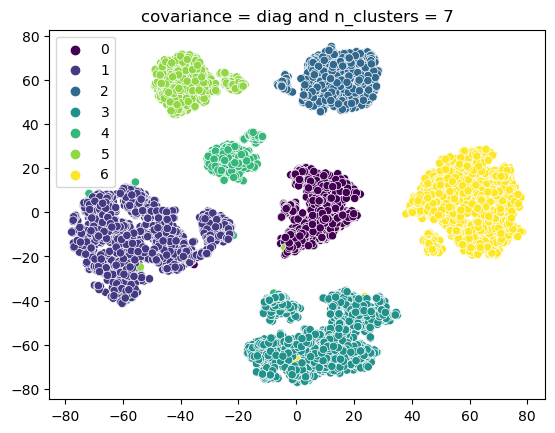

Shilouette score:  0.44119516265289094


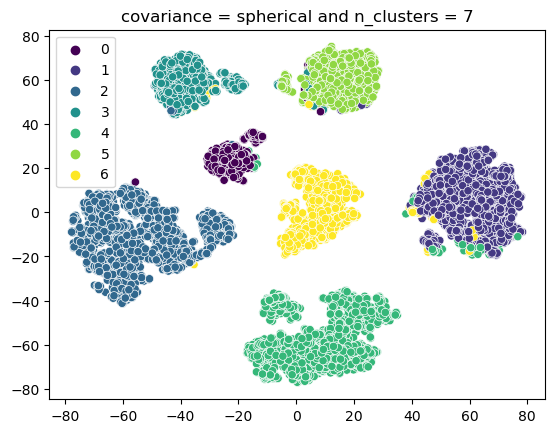

In [65]:
from sklearn.mixture import GaussianMixture

covariance = ['full', 'tied', 'diag', 'spherical']
inertia = []
for c in covariance:
        gmm = GaussianMixture(n_components=7, covariance_type=c).fit(transformed_data)
        print("Shilouette score: ",silhouette_score(transformed_data, gmm.predict(transformed_data)))
        sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=gmm.predict(transformed_data),palette='viridis')
        plt.title('covariance = {} and n_clusters = 7'.format(c, i))
        plt.show()

<h4> After Trials Found That kmeans and GaussianMixture Have The best seperation

Text(0.5, 1.0, 'GMM')

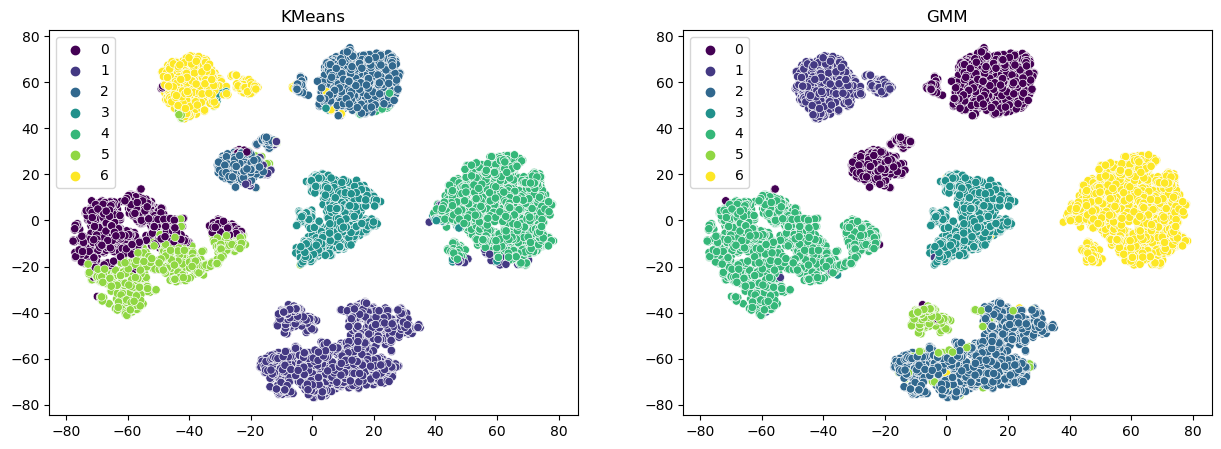

In [66]:
# import gaussian clustering
from sklearn.mixture import GaussianMixture

# covariance = ['full', 'tied', 'diag', 'spherical']
# inertia = []
# for c in covariance:
#         gmm = GaussianMixture(n_components=7, covariance_type=c).fit(pca_transformed_data)
#         print("Shilouette score: ",silhouette_score(pca_transformed_data, gmm.predict(pca_transformed_data)))
#         sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=gmm.predict(pca_transformed_data),palette='viridis')
#         plt.title('covariance = {} and n_clusters = 7'.format(c, i))
#         plt.show()
# best hyperparameters is covariance = full and n_clusters = 7
# create subplots of kmeans and gmm

gmm = GaussianMixture(n_components=7, covariance_type='full').fit(transformed_data)
kmeans = KMeans(n_clusters=7, n_init="auto").fit(transformed_data)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.title("Without PCA")
sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=kmeans.labels_,palette='viridis', ax=axes[0])
axes[0].set_title('KMeans')
sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=gmm.predict(transformed_data),palette='viridis', ax=axes[1])
axes[1].set_title('GMM')

Text(0.5, 1.0, 'GMM')

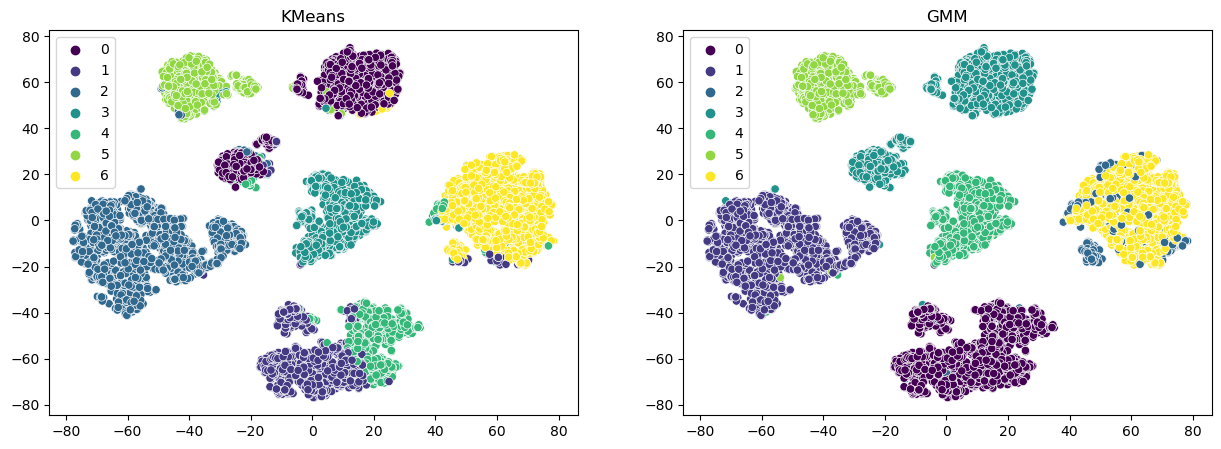

In [67]:
gmm = GaussianMixture(n_components=7, covariance_type='full').fit(pca_transformed_data)
kmeans = KMeans(n_clusters=7, n_init="auto").fit(pca_transformed_data)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.title("With PCA")
sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=kmeans.labels_,palette='viridis', ax=axes[0])
axes[0].set_title('KMeans')
sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=gmm.predict(pca_transformed_data),palette='viridis', ax=axes[1])
axes[1].set_title('GMM')

<h4> So From visualization it seam that GaussianMixture has best sepration after applying pca

So i will use kmeans as clustring algorithm on pca projection data

In [68]:
df_copy.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [69]:
df_copy['cluster'] = gmm.predict(pca_transformed_data)

<Axes: >

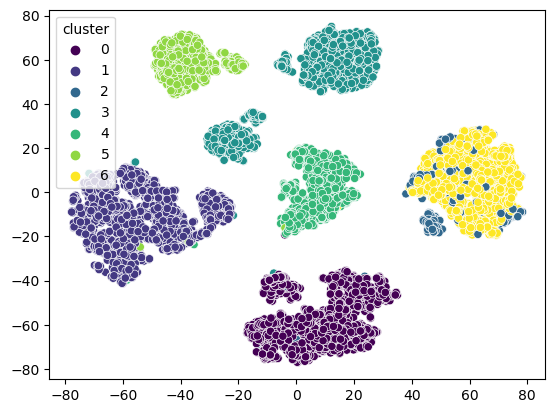

In [70]:
sns.scatterplot(x=tsne_empeddings[:,:1].reshape(-1),y = tsne_empeddings[:,1:].reshape(-1),hue=df_copy['cluster'],palette='viridis')


<Axes: xlabel='cluster'>

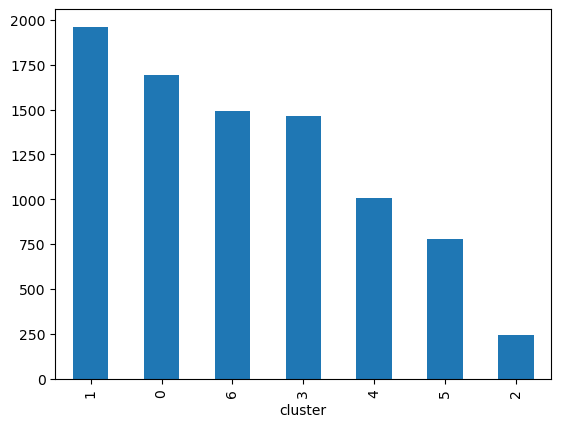

In [71]:
df_copy['cluster'].value_counts()

df_copy['cluster'].value_counts().plot(kind='bar')


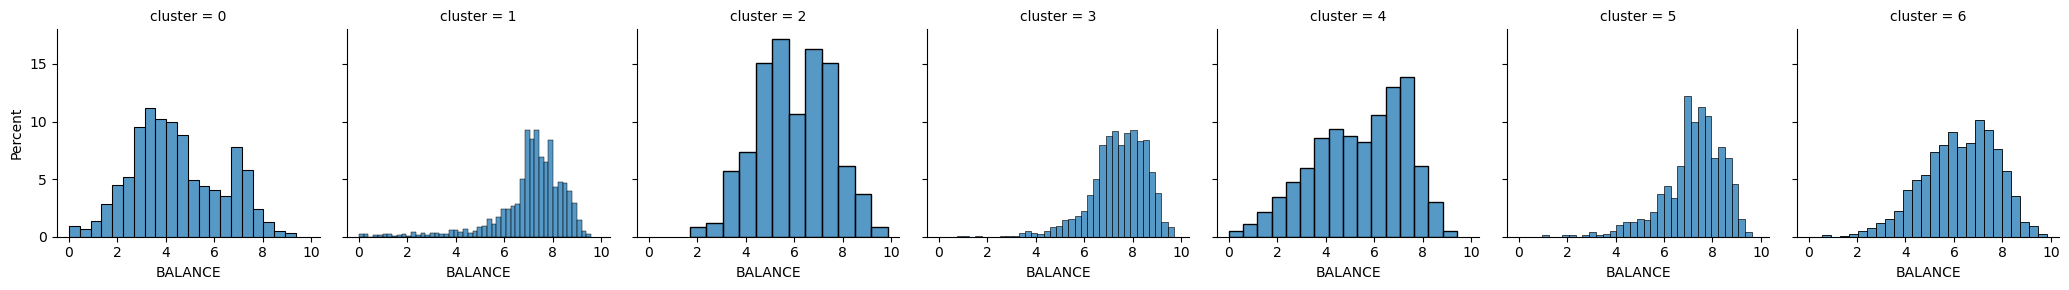

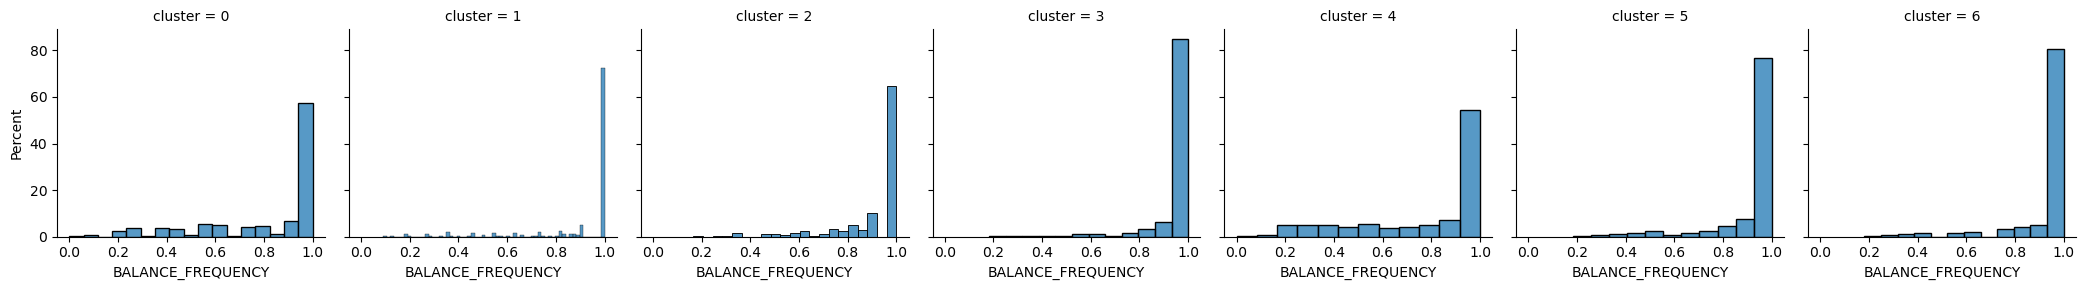

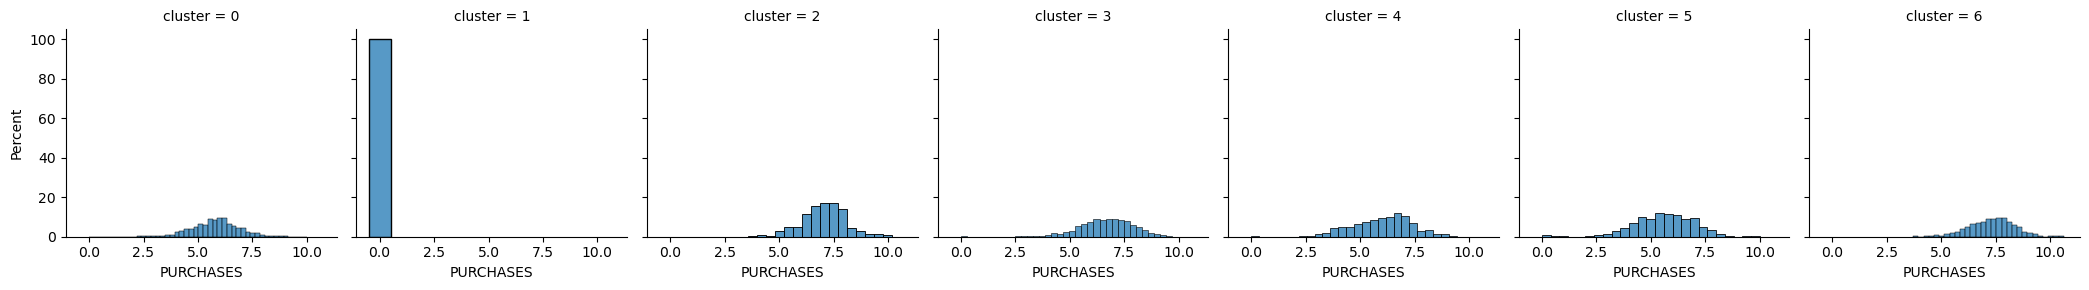

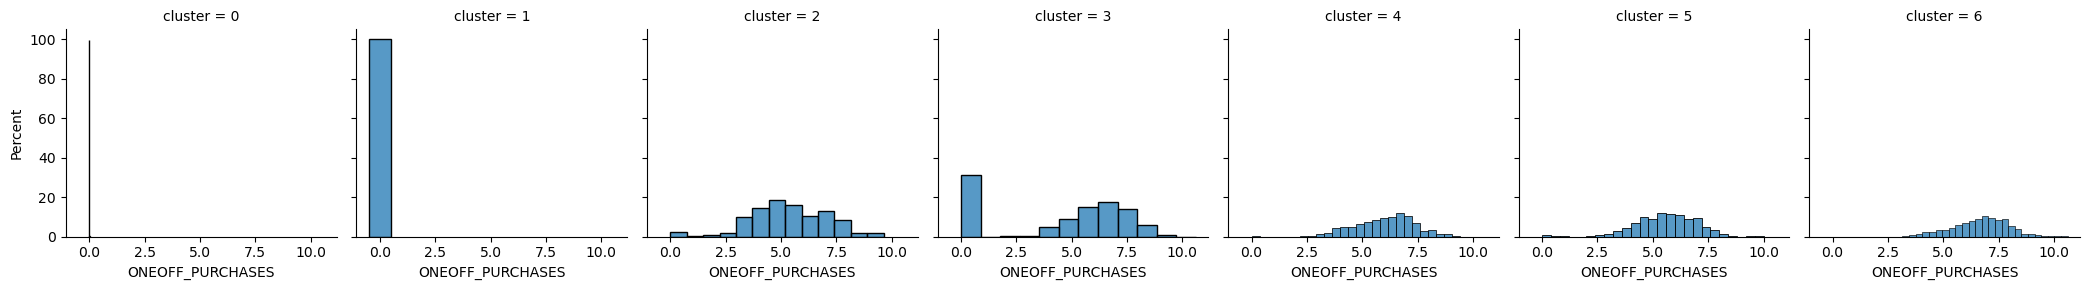

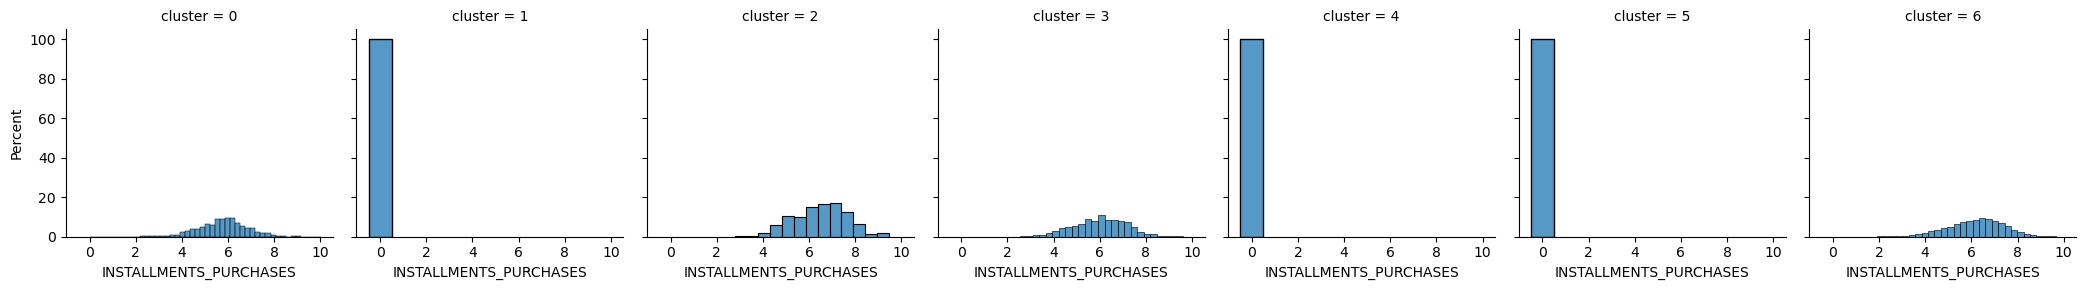

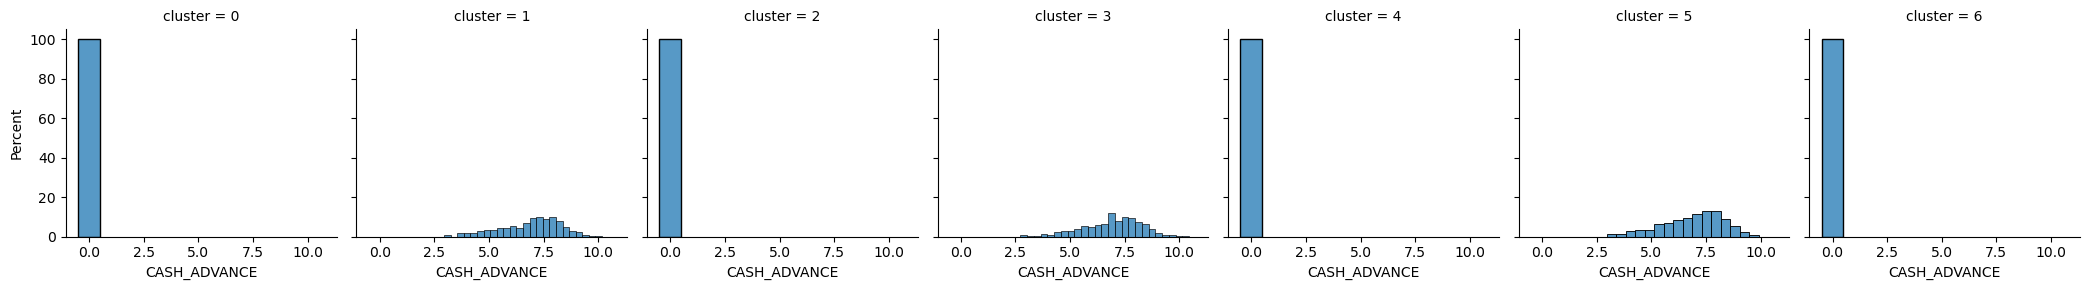

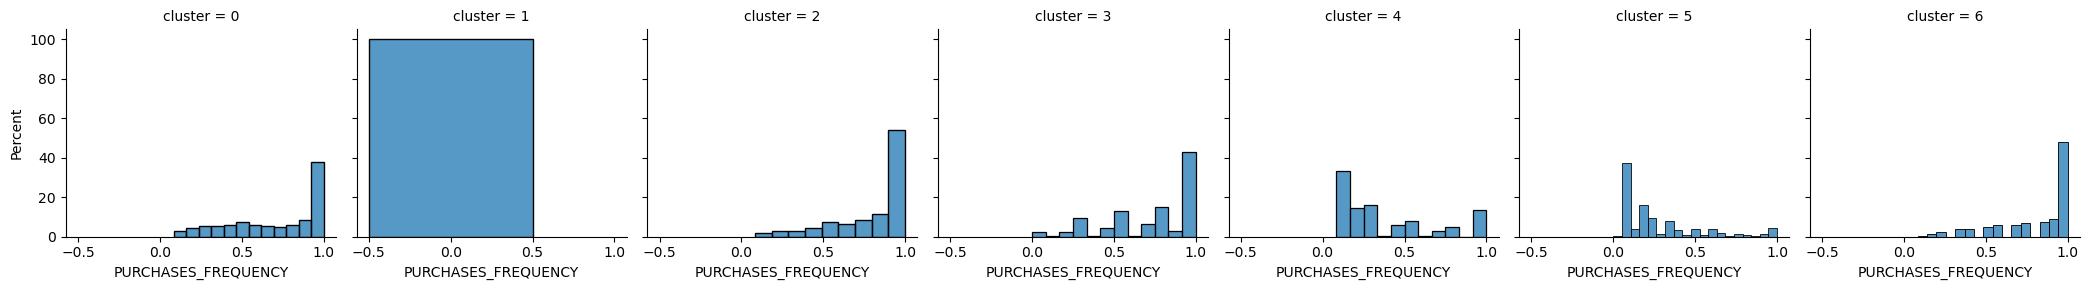

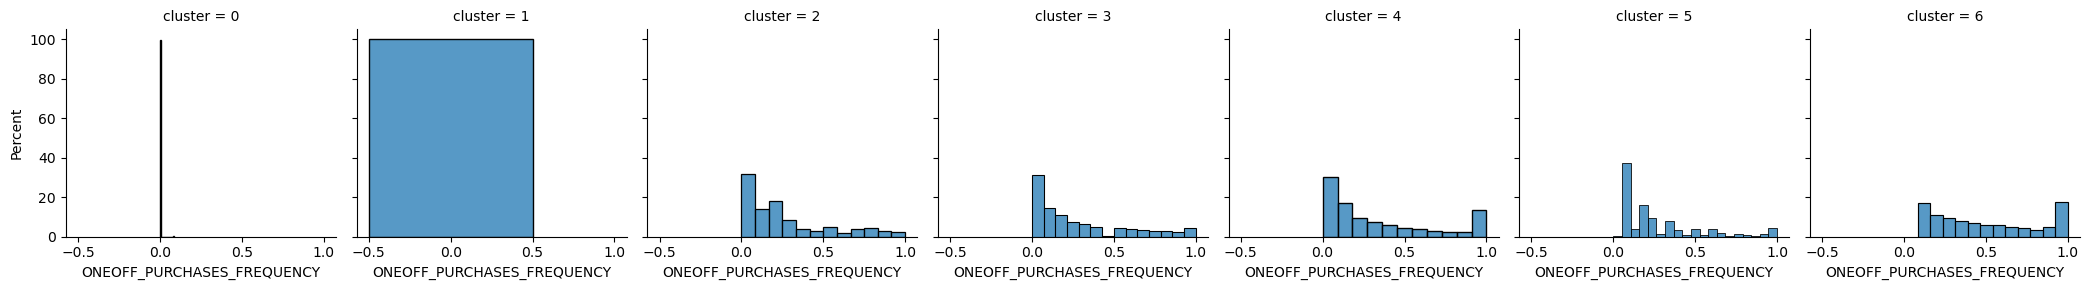

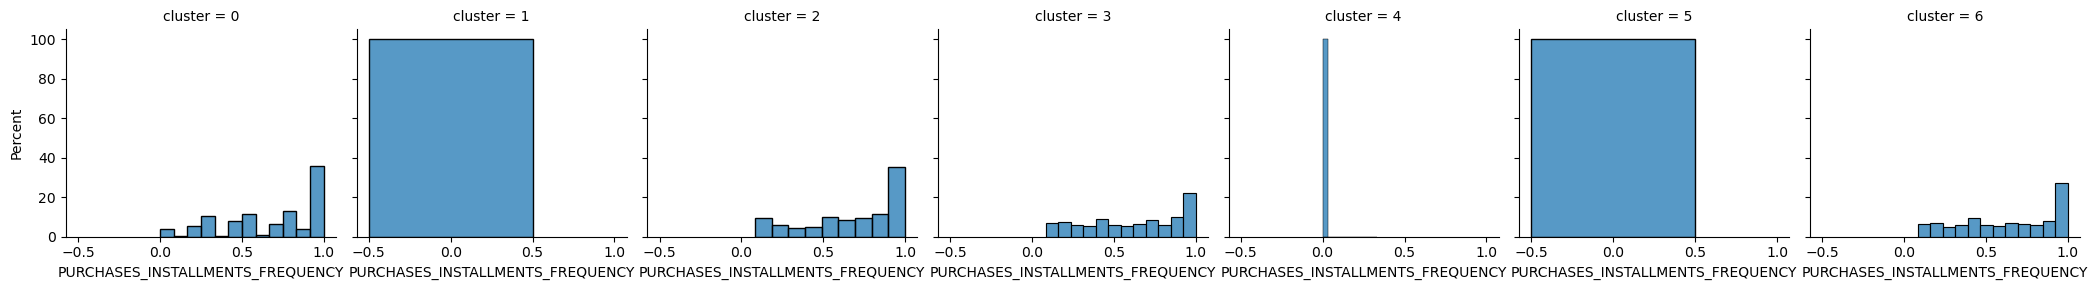

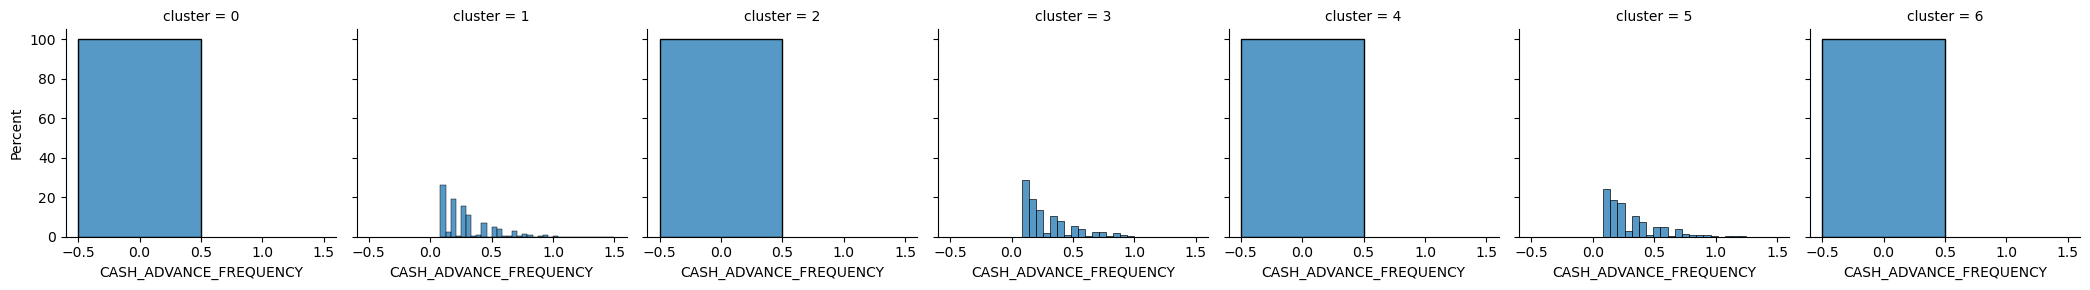

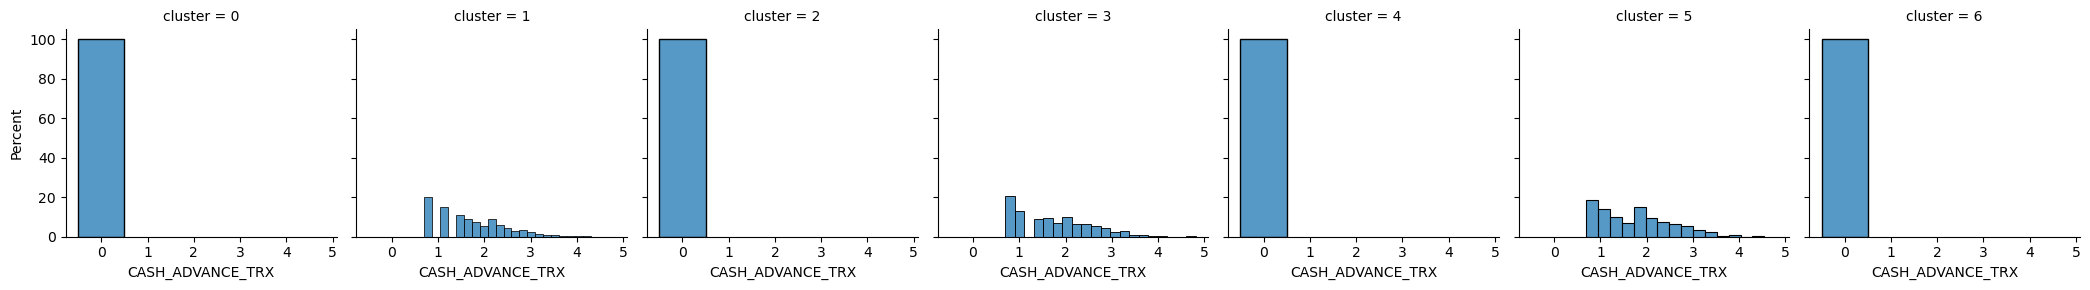

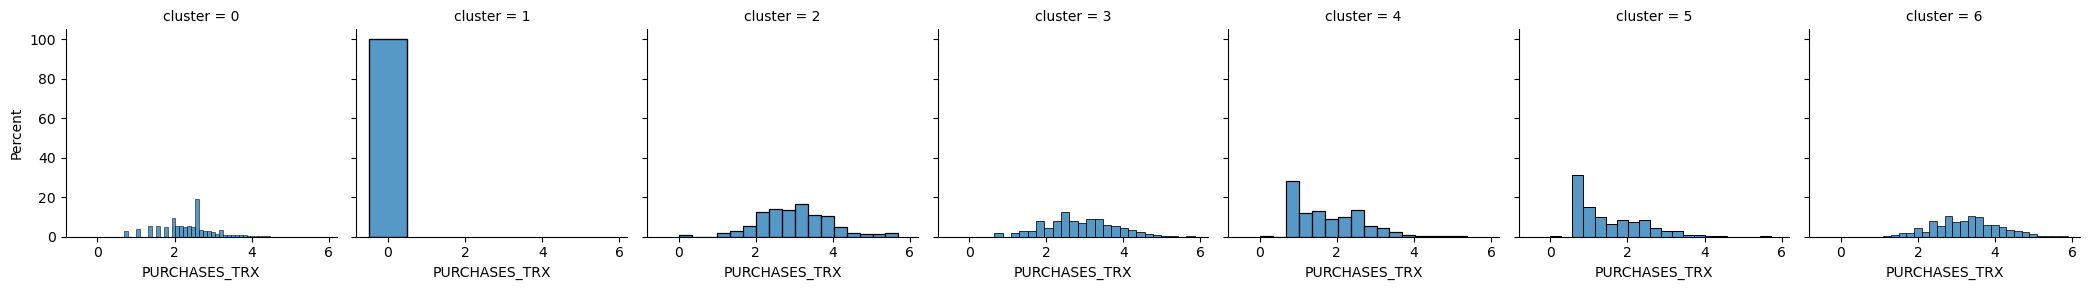

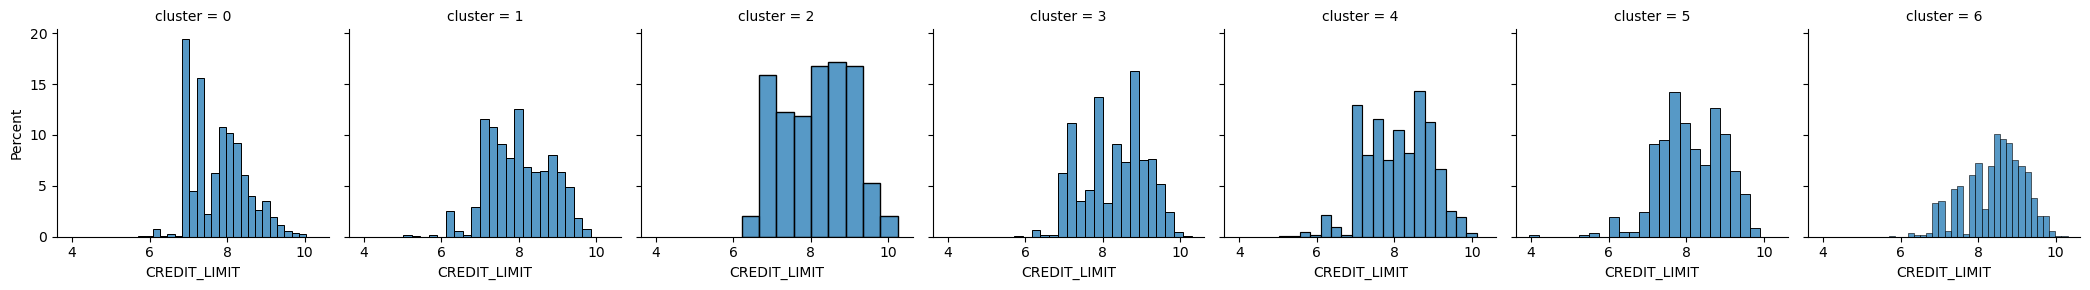

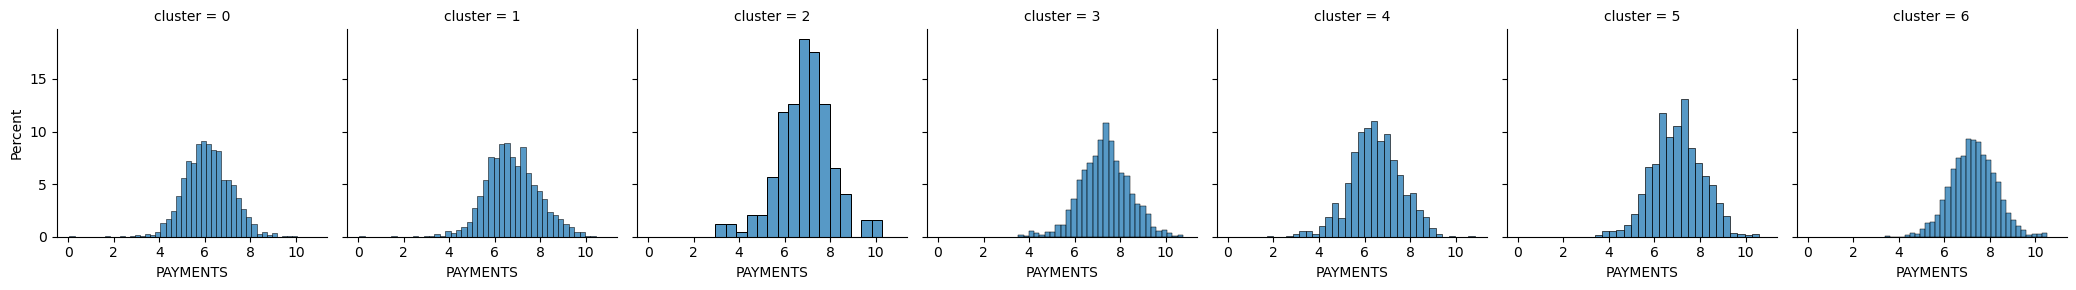

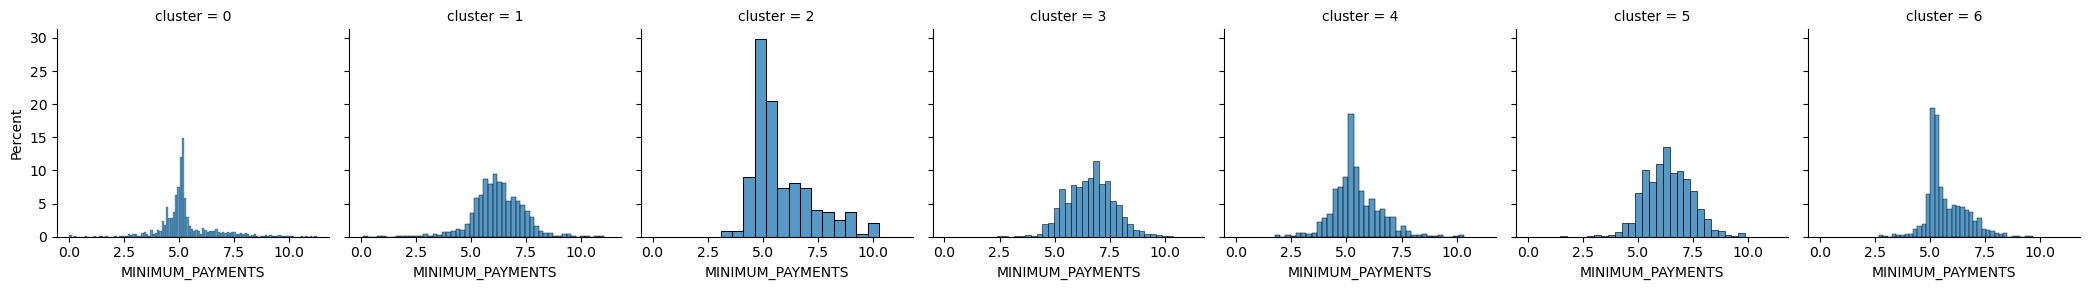

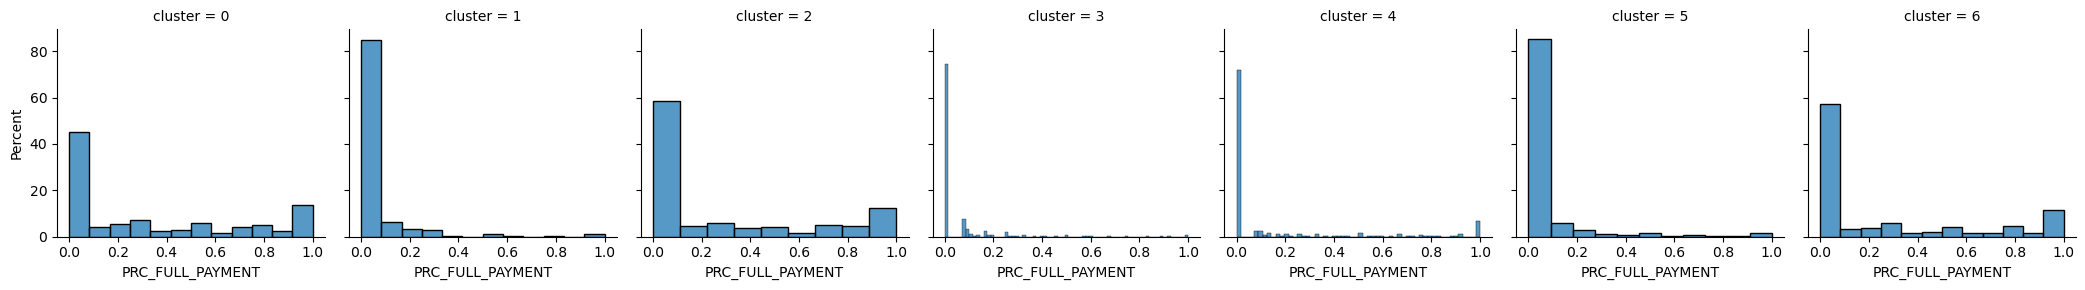

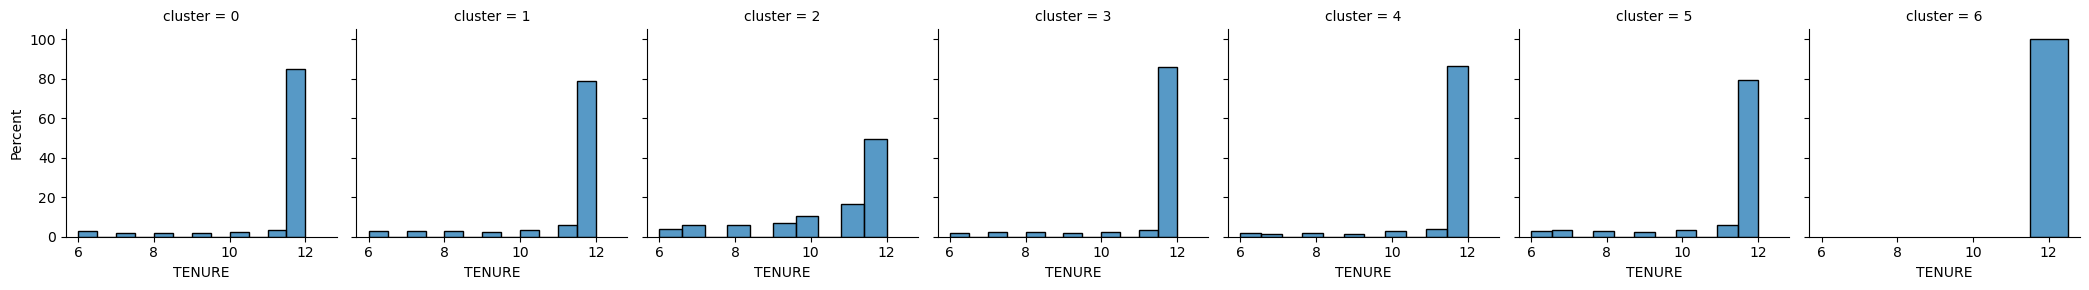

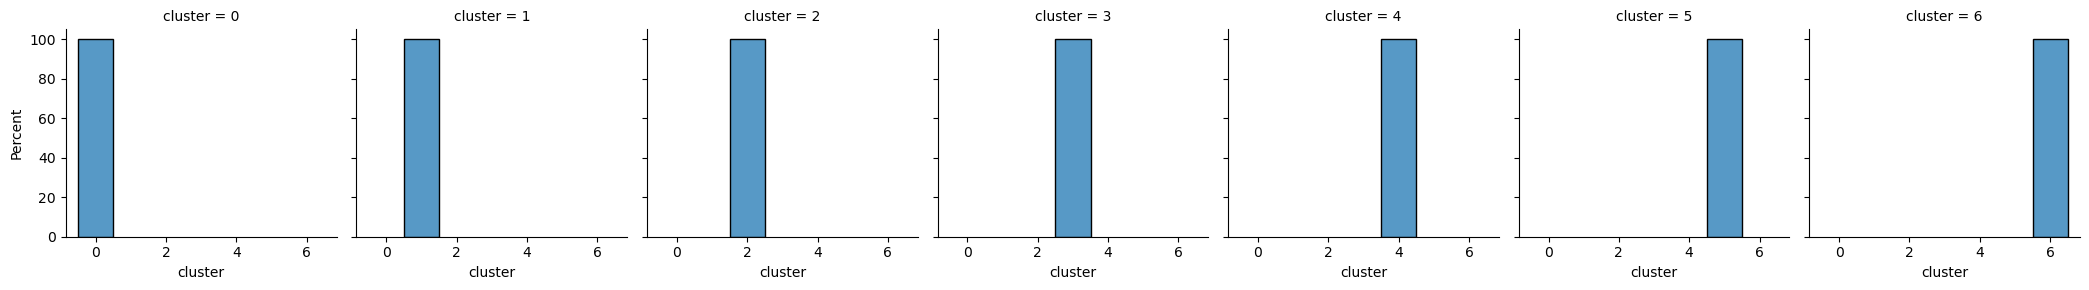

In [72]:
for c in transformed_data:
    grid= sns.FacetGrid(transformed_data, col='cluster')
    grid.map(sns.histplot, c,  stat='percent')

In [73]:
df_copy.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster'],
      dtype='object')

In [74]:
# the distribution of the feature BLANNCE in clusters
# the mean an median of balance distribution in each cluster
for c in df_copy.columns:
    if c != 'cluster':
        print(c)
        print(df_copy.groupby('cluster')[c].agg(['mean', 'median']))


BALANCE
             mean    median
cluster                    
0        4.445357  4.152862
1        7.097347  7.319982
2        5.985090  5.970115
3        7.416438  7.538405
4        5.416146  5.665794
5        7.232340  7.385889
6        6.218572  6.313865
BALANCE_FREQUENCY
             mean  median
cluster                  
0        0.823497     1.0
1        0.903535     1.0
2        0.907119     1.0
3        0.966035     1.0
4        0.792170     1.0
5        0.933524     1.0
6        0.942443     1.0
PURCHASES
             mean    median
cluster                    
0        5.774048  5.829650
1        0.000000  0.000000
2        7.038092  7.129610
3        6.670072  6.744012
4        5.995346  6.126214
5        5.612984  5.656900
6        7.320664  7.369884
ONEOFF_PURCHASES
             mean    median
cluster                    
0        0.000029  0.000000
1        0.000000  0.000000
2        5.291701  5.232818
3        4.341105  5.488376
4        5.995521  6.126214
5        5.61

In [75]:
# the cluster number 4 has the lowst mean and median of the feature PURCHASES , ONEOFF_PURCHASES which means that people in this cluster the purchases made from account are low
# the cluser number 6 has lowst mean and median of BALANCE which means that people in this cluster have low balance  in their account so they represent the low income people and it's logical that BALANCE_FREQUENCY is low in this cluster
# it seams that cluster number 1 , 3 , 5 have the 0 in CASH_ADVANCE and CASH_ADVANCE_FREQUENCY which means that people in these clusters don't use the cash advance service so they are the people who don't use the credit card frequently
# cluster number 3 show that people in this cluster hightst mean and median of PURCHASES_FREQUENCY which means that people in this clustr they have high income and PURCHASES_TRX is high too
# it seams that all cluster have the same mean and median of the feature TENURE which means that the tenure is not a good feature to distinguish between the clusters
# it seams that cluser 1 and 3 have the hightst mean and median of the feature PRC_FULL_PAYMENT which means that people in these clusters they pay the full payment frequently so they are the people who don't have the financial problems
# clusert number  2 ,4 ,5 have 0 in the feature INSTALLMENTS_PURCHASES which means that people in these clusters they don't use the installment purchases service so they are the people who don't have the financial problems
# it seams that cluser number 1 , 4 , 6 have 0 in ONEOFF_PURCHASES which mean that people in thoose clusters has lowst Maximum purchase amount done in one-go so they are the people who don't have the financial problems

## Cluster Summaries and Business Meanings

### Cluster 0:
- **Characteristics:**
  - Lowest balance among clusters.
  - Moderate balance frequency.
  - Moderate purchases with a frequent frequency.
- **Business Meaning:**
  - These customers maintain low balances and make moderate purchases regularly. They might be cautious spenders who prefer to keep their balances low but still use their accounts for purchases.

### Cluster 1:
- **Characteristics:**
  - Zero purchases and cash advances.
  - Low balance frequency.
- **Business Meaning:**
  - These customers seem inactive in terms of purchasing and cash advances. They might be dormant or occasional users of their accounts, possibly needing incentives to engage more actively.

### Cluster 2:
- **Characteristics:**
  - Moderate balance and balance frequency.
  - Moderate purchases with installment purchases.
- **Business Meaning:**
  - These customers maintain moderate balances and engage in purchases, particularly using installment plans. They might be budget-conscious individuals who prefer to spread their payments over time.

### Cluster 3:
- **Characteristics:**
  - High balance and balance frequency.
  - High purchase frequency, particularly one-off purchases.
- **Business Meaning:**
  - These customers maintain high balances and frequently make purchases, especially one-off transactions. They might be high-value customers who prefer one-time purchases over installment plans.

### Cluster 4:
- **Characteristics:**
  - Low balance and balance frequency.
  - Low or zero purchases and cash advances.
- **Business Meaning:**
  - These customers maintain low balances and rarely use their accounts for purchases or cash advances. They might be occasional users or individuals with specific financial constraints.

### Cluster 5:
- **Characteristics:**
  - High balance and balance frequency.
  - Low purchases and cash advances.
- **Business Meaning:**
  - These customers maintain high balances but use their accounts sparingly for purchases and cash advances. They might be conservative users who prioritize saving over spending.

### Cluster 6:
- **Characteristics:**
  - Moderate balance with low balance frequency.
  - High purchases, including one-off purchases.
- **Business Meaning:**
  - These customers maintain moderate balances but engage in significant purchase activities, especially one-off purchases. They might be individuals who occasionally indulge in high-value purchases.
